In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


# **Project Summary**

# **Overview of the Datasets**


The datasets used in this project are taken from the [Creative Enterprise Zones (CEZ) data repository](https://data.london.gov.uk/dataset/cez-data-repository): a publically available data repository aggregated by the Greater London Authority (GLA) and Partnering Regeneration Development Ltd. (PRD), and maintained by the GLA Culture Team.

This project will build upon the scope and outlook of the report produced by PRD which can be accesed [here](https://prdweb.co.uk/projects/gla-cultural-infrastructure-review/). The findings of the report are not publically available.

**Statistical Geographies**

The boundaries of the CEZ's have been defined using MSOA's. According to the office of national statstics:

"Middle layer Super Output Areas (MSOAs) are made up of groups of Lower layer Super Output Areas (LSOAs), usually four or five. They comprise between 2,000 and 6,000 households and have a usually resident population between 5,000 and 15,000 persons. MSOAs fit within local authorities." ([Statistical Geographies-Office for National Statistics](https://www.ons.gov.uk/methodology/geography/ukgeographies/statisticalgeographies#:~:text=Middle%20layer%20Super%20Output%20Areas%20(MSOAs)&text=MSOAs%20fit%20within%20local%20authorities,England%20and%20408%20in%20Wales.))

Census data is collected for each MSOA. See 'First-steps Towards Optimization'.

 CEZ's are approximations of the areas they describe and are typically constituated by multiple neighbouring MSOAs placed together as 'composite authorities'.

 'Comparator' areas are included in the dataset. These are creative areas which don't fall under the CEZ designation. They are as follows: 'Peckham and Camberwell', 'Barking', 'Woolwich', 'London Fields', 'Hainault', 'Crystal Palace'.  

**SIC Codes**

The data makes use of Standard Industrial Classification (SIC) codes. These are defined by the Department for Digital, Culture, Media and Sport (DCMS).

**The Datasets**

1. 'Job and buissiness calculations for creative areas'.

2. 'Births and deaths calculations for creative areas'

3. 'Turnover calculations for creative areas'

# **Understanding the Datasets & Exploring Granularity**

**Exploring the granularity of the jobs and buissiness calculations datasets for creative areas.**

Datasets 2 and 3 have a granularity matching the activity x subsector aggregation in dataset 1. In other words, as this level of granularity is common to all datasets, aggregation by SIC codes is only present for dataset 1. When joining the datasets later (see: Data Collation and Aggregation) they can only be joined on the level of granularity consistent with 'subsector' as opposed to SIC

In [2]:
#Jobs and Buissneses datasets

df_jobs_SIC = pd.read_csv("/content/area_jobsbiz_SIC_code.csv")
df_jobs_subsect = pd.read_csv("/content/area_jobsbiz_activity_x_subsector.csv")

# births and deaths
df_birthsdeaths_subsect = pd.read_csv("/content/area_birthsdeaths_activity_x_subsector.csv")

# turnover rates

df_turnover_subsect = pd.read_csv("/content/area_turnover_activity_x_subsect.csv")

Some basic measures of granularity between the two datasets (low ↑ high) :


In [3]:
for df in [df_jobs_SIC, df_jobs_subsect, df_birthsdeaths_subsect, df_turnover_subsect]:
  print(df.shape, (df.describe().drop(['year'], axis=1)), df.columns)




(9384, 15)            sic_code       sum_jobs       sum_biz
count   9384.000000    9384.000000   9384.000000
mean   62540.901961     405.021313     89.684569
std    20427.610785    3940.882592   1019.515664
min    13300.000000       0.000000      0.000000
25%    58142.000000       0.000000      0.000000
50%    60100.000000       0.000000      0.000000
75%    74203.000000      15.000000      5.000000
max    91030.000000  127000.000000  33920.000000 Index(['area', 'area_type', 'activity', 'subsector', 'sic_code', 'sic_desc',
       'year', 'sum_jobs', 'sum_biz', 'idx_jobs', 'idx_biz', 'yoy_jobs',
       'yoy_biz', 'pct_chg_jobs', 'pct_chg_biz'],
      dtype='object')
(2760, 13)             sum_jobs       sum_biz
count    2760.000000   2760.000000
mean     1377.072464    304.927536
std     10264.941792   2422.119288
min         0.000000      0.000000
25%         0.000000      0.000000
50%        15.000000     10.000000
75%        70.000000     30.000000
max    191045.000000  44695.000000 

In [4]:
#Cardianlity calculation function

def cardinality_calculation(df, x):
    value_counts = df[x].value_counts()
    return value_counts


In [5]:
#cardinality calculation for df_jobs_SIC

columns = ['sic_code', 'area', 'area_type', 'activity', 'subsector', 'year']

for column in columns:
    cardinality = cardinality_calculation(df_jobs_SIC, column)
    print(f"Cardinality {column.capitalize()}:\n{cardinality}\n")


Cardinality Sic_code:
sic_code
85520    184
59112    184
74209    184
58110    184
58120    184
58130    184
58141    184
58142    184
58190    184
18202    184
58210    184
59111    184
59113    184
74201    184
59120    184
59131    184
59132    184
59133    184
60200    184
62011    184
74203    184
78101    184
18201    184
59200    184
74202    184
90030    184
90040    184
73110    184
91011    184
91012    184
91020    184
91030    184
47630    184
90010    184
74300    184
59140    184
73120    184
70210    184
71111    184
90020    184
71112    184
32120    184
32200    184
74100    184
13300    184
14190    184
18203    184
58290    184
62012    184
62020    184
60100    184
Name: count, dtype: int64

Cardinality Area:
area
Barking                       408
Harrow Road                   408
Tottenham                     408
Peckham & Camberwell          408
Park Royal (total)            408
Park Royal (secondary)        408
Park Royal (core)             408
London Fields     

In [6]:
# cardinality calculations for df_jobs_subsect

columns = [ 'area', 'area_type', 'activity', 'subsector', 'year']

for column in columns:
    cardinality = cardinality_calculation(df_jobs_subsect, column)
    print(f"Cardinality {column.capitalize()}:\n{cardinality}\n")


Cardinality Area:
area
Barking                       120
Harrow Road                   120
Tottenham                     120
Peckham & Camberwell          120
Park Royal (total)            120
Park Royal (secondary)        120
Park Royal (core)             120
London Fields                 120
London                        120
Islington                     120
Hounslow                      120
Hammersmith & Fulham          120
Blackhorse Lane               120
Hainault                      120
Hackney Wick & Fish Island    120
Deptford & New Cross          120
Crystal Palace                120
Croydon (total)               120
Croydon (South Norwood)       120
Croydon (core)                120
Brixton                       120
Brent                         120
Woolwich                      120
Name: count, dtype: int64

Cardinality Area_type:
area_type
CEZ 2018      960
comparator    720
CEZ 2022      600
CEZ 2023      360
London        120
Name: count, dtype: int64

Cardinality Activi

Note here that the cardianlity across subsectors is not consitent, with 'music, performance and visual arts' and 'screen and digital' containg 368 entries. The other listed subsectors contain 184 entries.

In [7]:
# cardinality calculations for df_birthsdeaths_subsect

columns = [ 'area', 'area_type', 'activity', 'subsector', 'year']

for column in columns:
    cardinality = cardinality_calculation(df_birthsdeaths_subsect, column)
    print(f"Cardinality {column.capitalize()}:\n{cardinality}\n")

Cardinality Area:
area
Barking                       105
Harrow Road                   105
Tottenham                     105
Peckham & Camberwell          105
Park Royal (total)            105
Park Royal (secondary)        105
Park Royal (core)             105
London Fields                 105
London                        105
Islington                     105
Hounslow                      105
Hammersmith & Fulham          105
Blackhorse Lane               105
Hainault                      105
Hackney Wick & Fish Island    105
Deptford & New Cross          105
Crystal Palace                105
Croydon (total)               105
Croydon (South Norwood)       105
Croydon (core)                105
Brixton                       105
Brent                         105
Woolwich                      105
Name: count, dtype: int64

Cardinality Area_type:
area_type
CEZ 2018      840
comparator    630
CEZ 2022      525
CEZ 2023      315
London        105
Name: count, dtype: int64

Cardinality Activi

There is no data given here for 2022. The cardinality by year however is consistent with the df_jobs_subsect dataframe meaning that the data could be aligned later on.

In [8]:
# Cardinality calculations for df_turnover_subsect

columns = [ 'area', 'area_type', 'activity', 'subsector', 'year']

for column in columns:
    cardinality = cardinality_calculation(df_turnover_subsect, column)
    print(f"Cardinality {column.capitalize()}:\n{cardinality}\n")

Cardinality Area:
area
Barking                       105
Harrow Road                   105
Tottenham                     105
Peckham & Camberwell          105
Park Royal (total)            105
Park Royal (secondary)        105
Park Royal (core)             105
London Fields                 105
London                        105
Islington                     105
Hounslow                      105
Hammersmith & Fulham          105
Blackhorse Lane               105
Hainault                      105
Hackney Wick & Fish Island    105
Deptford & New Cross          105
Crystal Palace                105
Croydon (total)               105
Croydon (South Norwood)       105
Croydon (core)                105
Brixton                       105
Woolwich                      105
Brent                          98
Name: count, dtype: int64

Cardinality Area_type:
area_type
CEZ 2018      840
comparator    630
CEZ 2022      525
CEZ 2023      308
London        105
Name: count, dtype: int64

Cardinality Activi

Brent is missing 7 entries. What are these entries?

In [9]:
# Values for Brent

brent_filter_turnover = df_turnover_subsect[df_turnover_subsect['area'] == 'Brent']

brent_filter_birthsdeaths = df_birthsdeaths_subsect[df_birthsdeaths_subsect['area'] == 'Brent']

In [10]:
# Cardinality for Turnover: Brent

columns = [ 'area', 'area_type', 'activity', 'subsector', 'year']

for column in columns:
    cardinality = cardinality_calculation(brent_filter_turnover, column)
    print(f"Cardinality {column.capitalize()}:\n{cardinality}\n")


Cardinality Area:
area
Brent    98
Name: count, dtype: int64

Cardinality Area_type:
area_type
CEZ 2023    98
Name: count, dtype: int64

Cardinality Activity:
activity
Production     77
Consumption    21
Name: count, dtype: int64

Cardinality Subsector:
subsector
Music, performance and visual arts    14
Screen and digital                    14
Other                                  7
Advertising & Marketing                7
Architecture                           7
Crafts                                 7
Design and designer fashion            7
Fashion manufacturing                  7
IT, software and computer services     7
Photography                            7
Publishing                             7
Sound                                  7
Name: count, dtype: int64

Cardinality Year:
year
2015    14
2016    14
2017    14
2018    14
2019    14
2020    14
2021    14
Name: count, dtype: int64



In [11]:
# Cardianlity for Birthsdeaths: Brent

columns = [ 'area', 'area_type', 'activity', 'subsector', 'year']

for column in columns:
    cardinality = cardinality_calculation(brent_filter_birthsdeaths, column)
    print(f"Cardinality {column.capitalize()}:\n{cardinality}\n")


Cardinality Area:
area
Brent    105
Name: count, dtype: int64

Cardinality Area_type:
area_type
CEZ 2023    105
Name: count, dtype: int64

Cardinality Activity:
activity
Production     77
Consumption    28
Name: count, dtype: int64

Cardinality Subsector:
subsector
Music, performance and visual arts    14
Screen and digital                    14
Museums, galleries and libraries       7
Other                                  7
Advertising & Marketing                7
Architecture                           7
Crafts                                 7
Design and designer fashion            7
Fashion manufacturing                  7
IT, software and computer services     7
Photography                            7
Publishing                             7
Sound                                  7
Name: count, dtype: int64

Cardinality Year:
year
2015    15
2016    15
2017    15
2018    15
2019    15
2020    15
2021    15
Name: count, dtype: int64



7 entries of  'Museums, galleries and libraries' are missing for Brent from the turnover dataset. indicating that there is no data for that subsector for each of the 7 years (2015-2021)

**Exploring the df_jobs_SIC dataframe**

In [12]:
#Unique SIC values

unique_SIC = df_jobs_SIC['sic_code'].unique()
unique_SIC

array([85520, 90040, 91011, 91012, 91020, 91030, 47630, 90010, 74300,
       59140, 73120, 70210, 73110, 71111, 71112, 32120, 32200, 74100,
       13300, 14190, 18203, 58290, 62012, 62020, 90020, 90030, 74201,
       74202, 74209, 58110, 58120, 58130, 58141, 58142, 58190, 18202,
       58210, 59111, 59112, 59113, 59120, 59131, 59132, 59133, 60200,
       62011, 74203, 78101, 18201, 59200, 60100])

In [13]:
len(unique_SIC)

51

In [14]:
# the number of non zero values in sum_jobs

sum_jobs_count = df_jobs_SIC['sum_jobs'].astype(bool).sum(axis=0)
sum_jobs_count

3588

In [15]:
# The number of non zero values in sum_biz

sum_biz_count = df_jobs_SIC['sum_biz'].astype(bool).sum(axis=0)
sum_biz_count

3500

In [16]:
#which SIC values are not represented in the dataset?

df_SIC_check = pd.read_csv("/content/activity_subsector_sic.csv")

unique_unique_SIC = df_SIC_check['siccode'].unique()
unique_unique_SIC


array([85520, 90040, 91011, 91012, 91020, 91030, 90010, 47630, 74300,
       59140, 73120, 70210, 73110, 71111, 71112, 32120, 32200, 74100,
       14190, 13300, 58290, 62012, 62020, 18203, 90020, 90030, 74201,
       74202, 74209, 58110, 58120, 58130, 58141, 58142, 58190, 62011,
       59111, 59112, 59113, 59120, 59131, 59132, 59133, 60200, 74203,
       18202, 78101, 58210, 59200, 60100, 18201, 43999, 71129, 50200,
       49410, 51210, 13960, 13922, 18129, 16100, 16290, 22290, 25990,
       31090, 32990, 31010, 74909, 46730, 47789, 46740, 46410, 77390])

In [17]:
# Comparing the arrays, converting to sets for comparison.

set_unique_SIC = set(unique_SIC)
set_unique_unique_SIC = set(unique_unique_SIC)

# which SIC values are not in the list of all SIC values?

jobs_SIC_values = set_unique_unique_SIC - set_unique_SIC
jobs_SIC_values

{13922,
 13960,
 16100,
 16290,
 18129,
 22290,
 25990,
 31010,
 31090,
 32990,
 43999,
 46410,
 46730,
 46740,
 47789,
 49410,
 50200,
 51210,
 71129,
 74909,
 77390}

In [18]:
# get the description for the SIC codes not present in jobs/buissiness datset
not_Sic_list = []

for x in jobs_SIC_values:
  SIC_description = df_SIC_check.loc[df_SIC_check['siccode']==x, 'sicdesc']
  not_Sic_list.append(SIC_description.iloc[0])
not_Sic_list

['Freight transport by road',
 'Manufacture of other fabricated metal products not elsewhere classified',
 'Manufacture of other technical and industrial textiles',
 'Freight air transport',
 'Wholesale of wood, construction materials and sanitary equipment',
 'Manufacture of other plastic products',
 'Wholesale of hardware, plumbing and heating equipment and supplies',
 'Sea and costal freight water transport',
 'Other professional, scientific and technical activities (not including\xa0environmental consultancy or quantity surveying)',
 'Manufacture of other products of wood',
 'Manufacture of office and shop furniture',
 'Other retail sale of new goods in specialised stores (other than by opticians or commercial art galleries)',
 'Wholesale of textiles',
 'Renting and leasing of machinery, equipment and tangible goods not elsewhere classified',
 'Printing (other than printing of newspapers and printing on labels and tags)',
 'Other engineering activities',
 'Other manufacturing not e

In [19]:
#Question: what are the top 5 most common words in this list, excluding prepositions?

from collections import Counter

count_list = []

for i in not_Sic_list:

  for z in i.split():
    count_list.append(z)

SIC_list_frequency = Counter(count_list)

#making the output more readable

SIC_list_frequency = pd.Series(SIC_list_frequency)
SIC_list_frequency = SIC_list_frequency.sort_values(ascending=False).drop(['of', 'and', 'Other', 'other', 'not', 'elsewhere', 'classified', 'activities'])
SIC_list_frequency.name = 'Frequency'
SIC_list_frequency.head(5)

Manufacture    7
Wholesale      3
transport      3
products       3
equipment      3
Name: Frequency, dtype: int64

In [20]:
# Another way to pose this question: What are the top 5 most common subsectors in this list?
# This level of granulalrity seems more useful in answerng the question

not_Sic_list_sub = []

for x in jobs_SIC_values:
  SIC_description = df_SIC_check.loc[df_SIC_check['siccode']==x, 'subsector']
  not_Sic_list_sub.append(SIC_description.iloc[0])
not_Sic_list_sub = pd.Series(not_Sic_list_sub)
not_Sic_list_sub.value_counts()

Manufacturing                   10
Wholesale and retail             5
Logistics                        3
Engineering and construction     2
Professional services            1
Name: count, dtype: int64

In [21]:
# which SIC values are in the list of all SIC values?

common_jobs_SIC_values = set_unique_unique_SIC.intersection(set_unique_SIC)
common_jobs_SIC_values

{13300,
 14190,
 18201,
 18202,
 18203,
 32120,
 32200,
 47630,
 58110,
 58120,
 58130,
 58141,
 58142,
 58190,
 58210,
 58290,
 59111,
 59112,
 59113,
 59120,
 59131,
 59132,
 59133,
 59140,
 59200,
 60100,
 60200,
 62011,
 62012,
 62020,
 70210,
 71111,
 71112,
 73110,
 73120,
 74100,
 74201,
 74202,
 74203,
 74209,
 74300,
 78101,
 85520,
 90010,
 90020,
 90030,
 90040,
 91011,
 91012,
 91020,
 91030}

In [22]:
common_Sic_list = []

for x in common_jobs_SIC_values:
  SIC_description = df_SIC_check.loc[df_SIC_check['siccode']==x, 'sicdesc']
  common_Sic_list.append(SIC_description.iloc[0])
common_Sic_list = pd.Series(common_Sic_list)


In [23]:
#Question: what are the top 5 most common words in this list, excluding prepositions?

common_count_list = []

for i in common_Sic_list:

  for z in i.split():
    common_count_list.append(z)

common_SIC_list_frequency = Counter(common_count_list)

#making the output more readable

common_SIC_list_frequency = pd.Series(common_SIC_list_frequency)
common_SIC_list_frequency = common_SIC_list_frequency.drop(['of', 'and', 'Other', 'other', 'not', 'elsewhere', 'classified', 'activities'])
common_SIC_list_frequency.name = 'Frequency'

# case insenstive

common_SIC_list_frequency.index = common_SIC_list_frequency.index.str.casefold()
common_SIC_list_frequency.groupby(common_SIC_list_frequency.index).sum().sort_values(ascending=False).head(5)


publishing    9
video         5
television    5
motion        5
portrait      3
Name: Frequency, dtype: int64

This string filtering gives an indication of the the type of activity that a buissness might be undertaking, which is not consistent across subsector. For instance 'publishing' activities happen across subsectors, not just in the Publishing subsector.



In [24]:
# Another way to pose this question: What are the top 5 most common subsectors in this list?

common_Sic_list_sub = []

for x in common_jobs_SIC_values:
  SIC_description = df_SIC_check.loc[df_SIC_check['siccode']==x, 'subsector']
  common_Sic_list_sub.append(SIC_description.iloc[0])
common_Sic_list_sub = pd.Series(common_Sic_list_sub).str.strip()
common_Sic_list_sub = common_Sic_list_sub.value_counts()
common_Sic_list_sub.groupby(common_Sic_list_sub.index).sum().sort_values(ascending=False).head(50)


Screen and digital                    15
Museums, galleries and libraries       6
Publishing                             6
IT, software and computer services     4
Music, performance and visual arts     4
Photography                            3
Sound                                  3
Advertising & Marketing                2
Architecture                           2
Crafts                                 2
Fashion manufacturing                  2
Design and designer fashion            1
Other                                  1
Name: count, dtype: int64

This level of granulalrity seems more useful in answering the question.


**jobs and Buissnesses dataset (SIC):**

There are 51 unique SIC codes out of a possible 72. The cardinality of the SIC codes is consistent across the dataset, with each SIC values having 184 entries. Similalry the number of entries per area is constant at 408. (independent variables)   

The area_type is broken down into contrasting classifiers. data for CEZ's has been collected at different times: 2018, 2020, 2023. however data is present for each of these across the years 2015-2022. the date indicates when the CEZ was added to the dataset/established. Comparator areas have the second highest number of entries **[x]** after CEZ 2018 **[x]**. London is provided as backdrop measure.

The SIC codes not utilised in the datasets have to do with the manafacturing and logistical aspects of the creative industries. There is already a question here: Is this subsector missing across the CEZ and Comparator areas and if so, why? These SIC codes could also have been exlcuded from the study as they dont accuratley pertain to 'creative' eterprises, but perhaps more auxillary and supportive activities.   


# **Data Collation**


**Is it possible to join the 3 datasets at the level of granularity given in the activity_x_subsector ?**

The births and deaths datset (dataset 2) is missing values for 2022. The Turnover dataset is also missing values for 2022.

7 entries of 'Museums, galleries and libraries' are missing for Brent from the turnover dataset. indicating that there is no data for that subsector for each of the 7 years (2015-2021)

**Steps towards collating the three dataframes:**

1.   remove all index calculations from copied dataframes (these will be added later)
2.   Add 7 rows to the turnover dataframe for Brent: Museums, Galleries and Libraries (these can be popualted later).
3. to preserve the level of granularity for the jobs activity subsector dataset think about adding synthetic rows for 2022 entries. Alternitavley remove the 2022 enteries from jobs_activity_x_subsector (populate later).
4. Combine the dataframes.


In [25]:
#remove columns

columns_jobs = ['idx_jobs', 'idx_biz', 'yoy_jobs', 'yoy_biz', 'pct_chg_jobs', 'pct_chg_biz']

columns_turnover = ['idx_turnover', 'yoy_turnover', 'pct_chg_turnover']

def drop_columns (df, cols):

  df = df.drop(cols, axis=1)

  return df



In [26]:
# Drop columns from df_jobs_subsect

df_jobs_subsect_minus = drop_columns(df_jobs_subsect, columns_jobs)
df_jobs_subsect_minus

area   area_type     activity                         subsector  \
0      Barking  comparator  Consumption  Museums, galleries and libraries   
1      Barking  comparator  Consumption  Museums, galleries and libraries   
2      Barking  comparator  Consumption  Museums, galleries and libraries   
3      Barking  comparator  Consumption  Museums, galleries and libraries   
4      Barking  comparator  Consumption  Museums, galleries and libraries   
...        ...         ...          ...                               ...   
2755  Woolwich  comparator   Production                             Sound   
2756  Woolwich  comparator   Production                             Sound   
2757  Woolwich  comparator   Production                             Sound   
2758  Woolwich  comparator   Production                             Sound   
2759  Woolwich  comparator   Production                             Sound   

      year  sum_jobs  sum_biz  
0     2015        30        0  
1     2016        30        0  
2     2017        30        0  
3     2018         0        0  
4     2019         0        0  
...    ...       ...      ...  
2755  2018         0        0  
2756  2019         0        0  
2757  2020         0        0  
2758  2021         0        0  
2759  2022         0        0  

[2760 rows x 7 columns]

In [27]:
# Drop columns from

df_turnover_subsect_minus = drop_columns(df_turnover_subsect, columns_turnover)
df_turnover_subsect_minus

area   area_type     activity                         subsector  \
0      Barking  comparator  Consumption  Museums, galleries and libraries   
1      Barking  comparator  Consumption  Museums, galleries and libraries   
2      Barking  comparator  Consumption  Museums, galleries and libraries   
3      Barking  comparator  Consumption  Museums, galleries and libraries   
4      Barking  comparator  Consumption  Museums, galleries and libraries   
...        ...         ...          ...                               ...   
2403  Woolwich  comparator   Production                             Sound   
2404  Woolwich  comparator   Production                             Sound   
2405  Woolwich  comparator   Production                             Sound   
2406  Woolwich  comparator   Production                             Sound   
2407  Woolwich  comparator   Production                             Sound   

      year  turnover_area_000s  
0     2015                 0.0  
1     2016                 0.0  
2     2017                 0.0  
3     2018                 0.0  
4     2019                 0.0  
...    ...                 ...  
2403  2017                 0.0  
2404  2018                 0.0  
2405  2019                 0.0  
2406  2020                 0.0  
2407  2021                 0.0  

[2408 rows x 6 columns]

**2.**  

 Add 7 rows to the turnover dataframe for Brent: Museums, Galleries and Libraries (these can be popualted later).

In [28]:
# calling up the rows from birthsdeaths
df_birthsdeaths_brent_museum = df_birthsdeaths_subsect[(df_birthsdeaths_subsect['area'] == 'Brent') & (df_birthsdeaths_subsect['subsector'] == 'Museums, galleries and libraries')]
df_birthsdeaths_brent_museum

area area_type     activity                         subsector  year  \
210  Brent  CEZ 2023  Consumption  Museums, galleries and libraries  2015   
211  Brent  CEZ 2023  Consumption  Museums, galleries and libraries  2016   
212  Brent  CEZ 2023  Consumption  Museums, galleries and libraries  2017   
213  Brent  CEZ 2023  Consumption  Museums, galleries and libraries  2018   
214  Brent  CEZ 2023  Consumption  Museums, galleries and libraries  2019   
215  Brent  CEZ 2023  Consumption  Museums, galleries and libraries  2020   
216  Brent  CEZ 2023  Consumption  Museums, galleries and libraries  2021   

     n_biz  n_births  n_deaths  
210      0       0.0       0.0  
211      0       0.0       0.0  
212      0       0.0       0.0  
213      0       0.0       0.0  
214      0       0.0       0.0  
215      0       0.0       0.0  
216      0       0.0       0.0

In [29]:
# configuring the columns to match turnover dataframe

columns_brent_museum = ['n_biz', 'n_births', 'n_deaths']

df_birthsdeaths_brent_museum =  drop_columns(df_birthsdeaths_brent_museum, columns_brent_museum)
df_birthsdeaths_brent_museum['turnover_area_000s'] = 0
df_birthsdeaths_brent_museum

area area_type     activity                         subsector  year  \
210  Brent  CEZ 2023  Consumption  Museums, galleries and libraries  2015   
211  Brent  CEZ 2023  Consumption  Museums, galleries and libraries  2016   
212  Brent  CEZ 2023  Consumption  Museums, galleries and libraries  2017   
213  Brent  CEZ 2023  Consumption  Museums, galleries and libraries  2018   
214  Brent  CEZ 2023  Consumption  Museums, galleries and libraries  2019   
215  Brent  CEZ 2023  Consumption  Museums, galleries and libraries  2020   
216  Brent  CEZ 2023  Consumption  Museums, galleries and libraries  2021   

     turnover_area_000s  
210                   0  
211                   0  
212                   0  
213                   0  
214                   0  
215                   0  
216                   0

In [30]:
# inserting them into the turnover dataframe
# ONLY HIT THIS ONCE PER RUN

df_turnover_subsect_minus = pd.concat([df_turnover_subsect_minus, df_birthsdeaths_brent_museum], ignore_index = False)
df_turnover_subsect_minus

area   area_type     activity                         subsector  year  \
0    Barking  comparator  Consumption  Museums, galleries and libraries  2015   
1    Barking  comparator  Consumption  Museums, galleries and libraries  2016   
2    Barking  comparator  Consumption  Museums, galleries and libraries  2017   
3    Barking  comparator  Consumption  Museums, galleries and libraries  2018   
4    Barking  comparator  Consumption  Museums, galleries and libraries  2019   
..       ...         ...          ...                               ...   ...   
212    Brent    CEZ 2023  Consumption  Museums, galleries and libraries  2017   
213    Brent    CEZ 2023  Consumption  Museums, galleries and libraries  2018   
214    Brent    CEZ 2023  Consumption  Museums, galleries and libraries  2019   
215    Brent    CEZ 2023  Consumption  Museums, galleries and libraries  2020   
216    Brent    CEZ 2023  Consumption  Museums, galleries and libraries  2021   

     turnover_area_000s  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  
..                  ...  
212                 0.0  
213                 0.0  
214                 0.0  
215                 0.0  
216                 0.0  

[2415 rows x 6 columns]

In [31]:
# Check: Cardinality calculations for df_turnover_subsect_minus

columns = [ 'area', 'area_type', 'activity', 'subsector', 'year']

for column in columns:
    cardinality = cardinality_calculation(df_turnover_subsect_minus, column)
    print(f"Cardinality {column.capitalize()}:\n{cardinality}\n")

Cardinality Area:
area
Barking                       105
Harrow Road                   105
Tottenham                     105
Peckham & Camberwell          105
Park Royal (total)            105
Park Royal (secondary)        105
Park Royal (core)             105
London Fields                 105
London                        105
Islington                     105
Hounslow                      105
Hammersmith & Fulham          105
Blackhorse Lane               105
Hainault                      105
Hackney Wick & Fish Island    105
Deptford & New Cross          105
Crystal Palace                105
Croydon (total)               105
Croydon (South Norwood)       105
Croydon (core)                105
Brixton                       105
Brent                         105
Woolwich                      105
Name: count, dtype: int64

Cardinality Area_type:
area_type
CEZ 2018      840
comparator    630
CEZ 2022      525
CEZ 2023      315
London        105
Name: count, dtype: int64

Cardinality Activi

In [32]:
df_turnover_subsect_minus.shape

(2415, 6)

In [33]:
df_birthsdeaths_subsect.shape

(2415, 8)

In [34]:
df_jobs_subsect_minus.shape

(2760, 7)

**3.**

to preserve the level of granularity for the jobs activity subsector dataset think about adding synthetic rows for 2022 entries. Alternitavley remove the 2022 enteries from jobs_activity_x_subsector (populate later). groupby function creates a new row for every single combination of column given. Adding new rows by iterting over a constant step doesnt seem to work at all.

In [35]:

#function to insert rows df_birthsdeaths_subsect
#either this doesnt need to be a function or the the function should be iterable across both dataframes
#FIX TO A SINGLE FUNCTION

def insert_row_2022(df):

    df['year'] = df['year'].astype(str)

    grouped = df.groupby(['area', 'area_type', 'activity', 'subsector'])

    new_rows = []

    for name, group in grouped:
            new_row = group.iloc[-1].copy()
            new_row['year'] = '2022'
            new_row[['n_biz', 'n_births', 'n_deaths']] = 0
            new_rows.append(new_row)

    df_result = pd.concat([df] + [pd.DataFrame(new_rows)], ignore_index=True)
    df_result = df_result.sort_values(['area', 'area_type', 'activity', 'subsector', 'year'])

    return df_result.reset_index(drop=True)

df_birthsdeaths_subsect = insert_row_2022(df_birthsdeaths_subsect)


In [36]:
#function to insert rows df_birthsdeaths_subsect
#SEE ABOVE

def insert_row_2022(df):

    df['year'] = df['year'].astype(str)

    grouped = df.groupby(['area', 'area_type', 'activity', 'subsector'])

    new_rows = []

    for name, group in grouped:
            new_row = group.iloc[-1].copy()
            new_row['year'] = '2022'
            new_row[['turnover_area_000s']] = 0
            new_rows.append(new_row)

    df_result = pd.concat([df] + [pd.DataFrame(new_rows)], ignore_index=True)
    df_result = df_result.sort_values(['area', 'area_type', 'activity', 'subsector', 'year'])

    return df_result.reset_index(drop=True)

df_turnover_subsect_minus = insert_row_2022(df_turnover_subsect_minus)


4. Combine the dataframes.

In [37]:
# had to import dask to help with RAM use on google collab.

import dask.dataframe as dd

ddf_jobs = dd.from_pandas(df_jobs_subsect_minus, npartitions=10)
ddf_births = dd.from_pandas(df_birthsdeaths_subsect, npartitions=10)
ddf_turnovers = dd.from_pandas(df_turnover_subsect_minus, npartitions=10)


master_df = (ddf_jobs
             .merge(ddf_births[['n_biz', 'n_births', 'n_deaths']], left_index=True, right_index=True, how='left')
             .merge(ddf_turnovers[['turnover_area_000s']], left_index=True, right_index=True, how='left')
             .compute())

master_df = master_df.reset_index()




/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [38]:
#drop n_biz because it is the same as sum_bizs

master_df.drop(['n_biz'], axis=1, inplace=True)
master_df

index      area   area_type     activity  \
0         0   Barking  comparator  Consumption   
1         1   Barking  comparator  Consumption   
2         2   Barking  comparator  Consumption   
3         3   Barking  comparator  Consumption   
4         4   Barking  comparator  Consumption   
...     ...       ...         ...          ...   
2755   2755  Woolwich  comparator   Production   
2756   2756  Woolwich  comparator   Production   
2757   2757  Woolwich  comparator   Production   
2758   2758  Woolwich  comparator   Production   
2759   2759  Woolwich  comparator   Production   

                             subsector  year  sum_jobs  sum_biz  n_births  \
0     Museums, galleries and libraries  2015        30        0       0.0   
1     Museums, galleries and libraries  2016        30        0       0.0   
2     Museums, galleries and libraries  2017        30        0       0.0   
3     Museums, galleries and libraries  2018         0        0       0.0   
4     Museums, galleries and libraries  2019         0        0       0.0   
...                                ...   ...       ...      ...       ...   
2755                             Sound  2018         0        0       0.0   
2756                             Sound  2019         0        0       0.0   
2757                             Sound  2020         0        0       0.0   
2758                             Sound  2021         0        0       0.0   
2759                             Sound  2022         0        0       0.0   

      n_deaths  turnover_area_000s  
0          0.0                 0.0  
1          0.0                 0.0  
2          0.0                 0.0  
3          0.0                 0.0  
4          0.0                 0.0  
...        ...                 ...  
2755       0.0                 0.0  
2756       0.0                 0.0  
2757       0.0                 0.0  
2758       0.0                 0.0  
2759       0.0                 0.0  

[2760 rows x 11 columns]

# **Data Aggregation, Analytical Transformations and Cleaning**

**1.**

Create a unique identifier based on the index position + area + subsector + year. This should take the place of the index column. Repeate this for both the master_dataframe and the SIC dataframe. In the latter the SIC code can replace subsector.

Create a string filter: if a string is larger than 3 characters take the first 4 characters and assign them to the unique_ID column. If the string is comprised of multiple words take the first 2 letters of each word and assign them to the ID column.


In [39]:
# unique ID generator.

def id_maker(df, cols):

    id_dicts = {}

    for col in cols:
        id_dicts[col] = {}
        idstem = df[col].unique()

        for string in idstem:
            if isinstance(string, str):
                if ',' in string:
                    colchar = string.split(',')[0][:4].lower()
                else:
                    colchar = string[:4].lower()
            else:
                colchar = str(string)[:4].lower()

            id_dicts[col][string] = colchar

    df['Unique ID'] = '#' + df.index.astype(str)

    for col in cols:
        df['Unique ID'] += df[col].map(id_dicts[col])

    return df

column_list = ['area', 'subsector', 'year']

master_df = id_maker(master_df, column_list)
master_df.set_index('Unique ID', inplace=True)
master_df.drop(['index'], axis=1, inplace=True)





In [40]:
# make column headings more readable and explanitory
# REMEMBER: set inplace as True
#think about renaming Turnover to 'Organisational turnover' or something of that ilk

rename_map_dict = { 'area':'Area',
                   'area_type':'Area type',
                    'activity':'Activity',
                    'subsector':'Subsector',
                    'year': 'Year',
                    'sum_jobs': 'Total jobs',
                    'sum_biz': 'Total organisations',
                    'n_births': "Total births",
                    'n_deaths' : "Total deaths",
                    'turnover_area_000s' : 'Turnover'}

master_df = master_df.rename(columns=rename_map_dict)
master_df


Area   Area type     Activity  \
Unique ID                                              
#0barkmuse2015      Barking  comparator  Consumption   
#1barkmuse2016      Barking  comparator  Consumption   
#2barkmuse2017      Barking  comparator  Consumption   
#3barkmuse2018      Barking  comparator  Consumption   
#4barkmuse2019      Barking  comparator  Consumption   
...                     ...         ...          ...   
#2755woolsoun2018  Woolwich  comparator   Production   
#2756woolsoun2019  Woolwich  comparator   Production   
#2757woolsoun2020  Woolwich  comparator   Production   
#2758woolsoun2021  Woolwich  comparator   Production   
#2759woolsoun2022  Woolwich  comparator   Production   

                                          Subsector  Year  Total jobs  \
Unique ID                                                               
#0barkmuse2015     Museums, galleries and libraries  2015          30   
#1barkmuse2016     Museums, galleries and libraries  2016          30   
#2barkmuse2017     Museums, galleries and libraries  2017          30   
#3barkmuse2018     Museums, galleries and libraries  2018           0   
#4barkmuse2019     Museums, galleries and libraries  2019           0   
...                                             ...   ...         ...   
#2755woolsoun2018                             Sound  2018           0   
#2756woolsoun2019                             Sound  2019           0   
#2757woolsoun2020                             Sound  2020           0   
#2758woolsoun2021                             Sound  2021           0   
#2759woolsoun2022                             Sound  2022           0   

                   Total organisations  Total births  Total deaths  Turnover  
Unique ID                                                                     
#0barkmuse2015                       0           0.0           0.0       0.0  
#1barkmuse2016                       0           0.0           0.0       0.0  
#2barkmuse2017                       0           0.0           0.0       0.0  
#3barkmuse2018                       0           0.0           0.0       0.0  
#4barkmuse2019                       0           0.0           0.0       0.0  
...                                ...           ...           ...       ...  
#2755woolsoun2018                    0           0.0           0.0       0.0  
#2756woolsoun2019                    0           0.0           0.0       0.0  
#2757woolsoun2020                    0           0.0           0.0       0.0  
#2758woolsoun2021                    0           0.0           0.0       0.0  
#2759woolsoun2022                    0           0.0           0.0       0.0  

[2760 rows x 10 columns]

In [41]:
# data conversion
# seems to be no issues

print(master_df.dtypes)

Area                   string[pyarrow]
Area type              string[pyarrow]
Activity               string[pyarrow]
Subsector              string[pyarrow]
Year                             int64
Total jobs                       int64
Total organisations              int64
Total births                   float64
Total deaths                   float64
Turnover                       float64
dtype: object


Check for outliers.

This work is provides an understanding of the data's variability and spread for each of the numeric columns.  

In [42]:
# checking for outliers

def describe(df, cols):
  for col in cols:
    print(df[col].describe())

columns_to_describe = ['Total jobs', 'Total organisations', 'Total births', 'Total deaths', 'Turnover']

describe(master_df, columns_to_describe)



count      2760.000000
mean       1377.072464
std       10264.941792
min           0.000000
25%           0.000000
50%          15.000000
75%          70.000000
max      191045.000000
Name: Total jobs, dtype: float64
count     2760.000000
mean       304.927536
std       2422.119288
min          0.000000
25%          0.000000
50%         10.000000
75%         30.000000
max      44695.000000
Name: Total organisations, dtype: float64
count    2760.000000
mean       40.046304
std       381.179553
min         0.000000
25%         0.000000
50%         0.700000
75%         3.125000
max      8730.500000
Name: Total births, dtype: float64
count    2760.000000
mean       31.864130
std       320.770791
min         0.000000
25%         0.000000
50%         0.600000
75%         2.400000
max      8714.700000
Name: Total deaths, dtype: float64
count    2.760000e+03
mean     3.309852e+05
std      2.727816e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.292000e+03
75%      9.697250e+03
max  

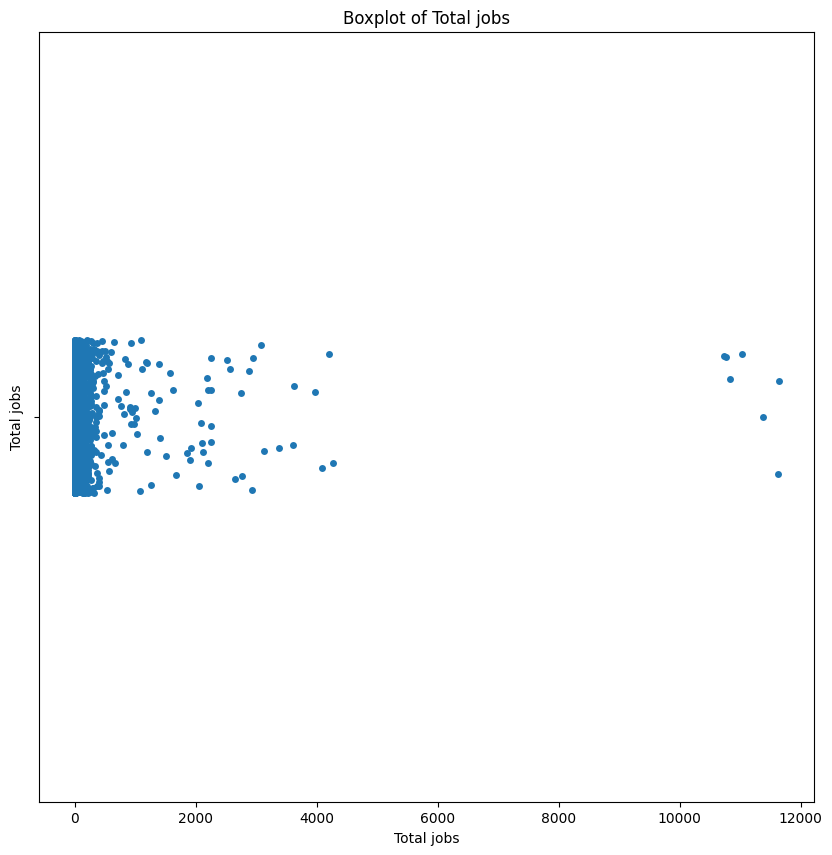

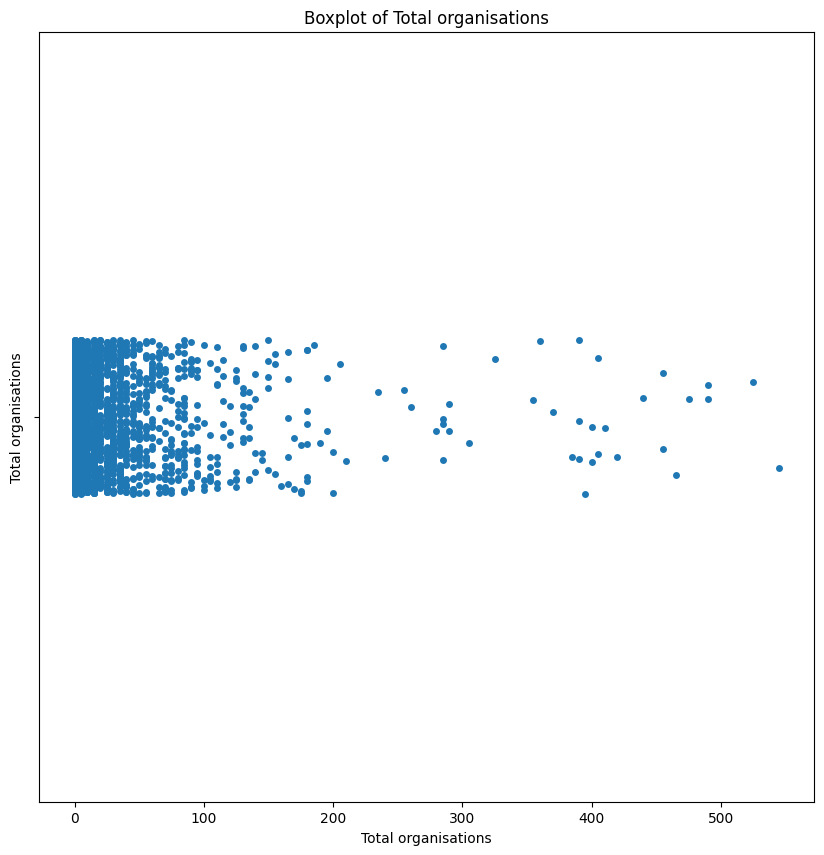

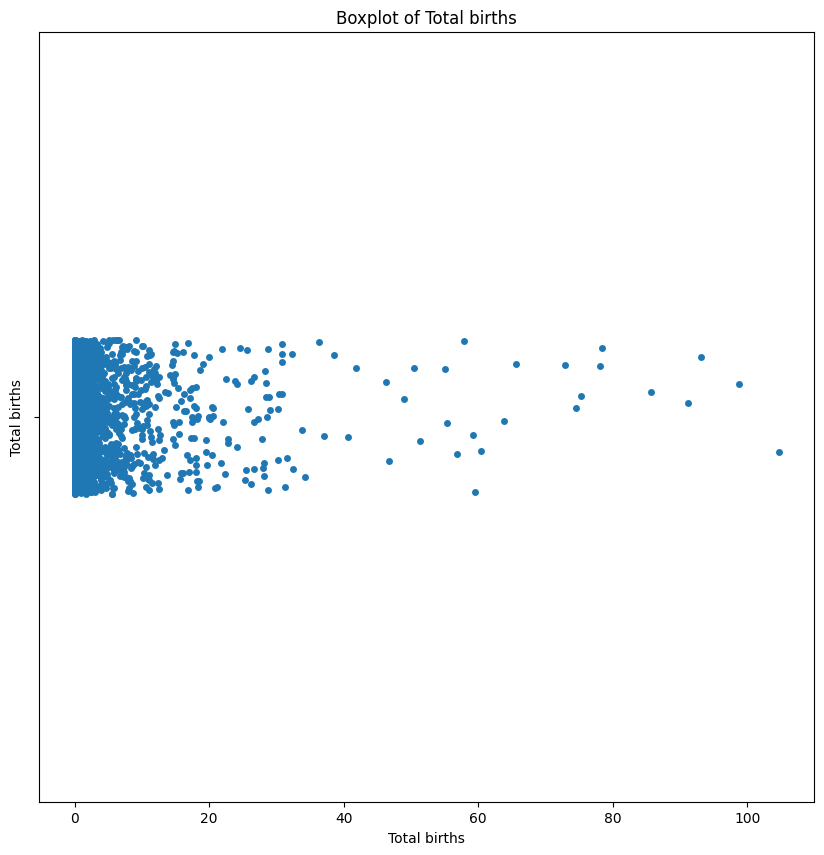

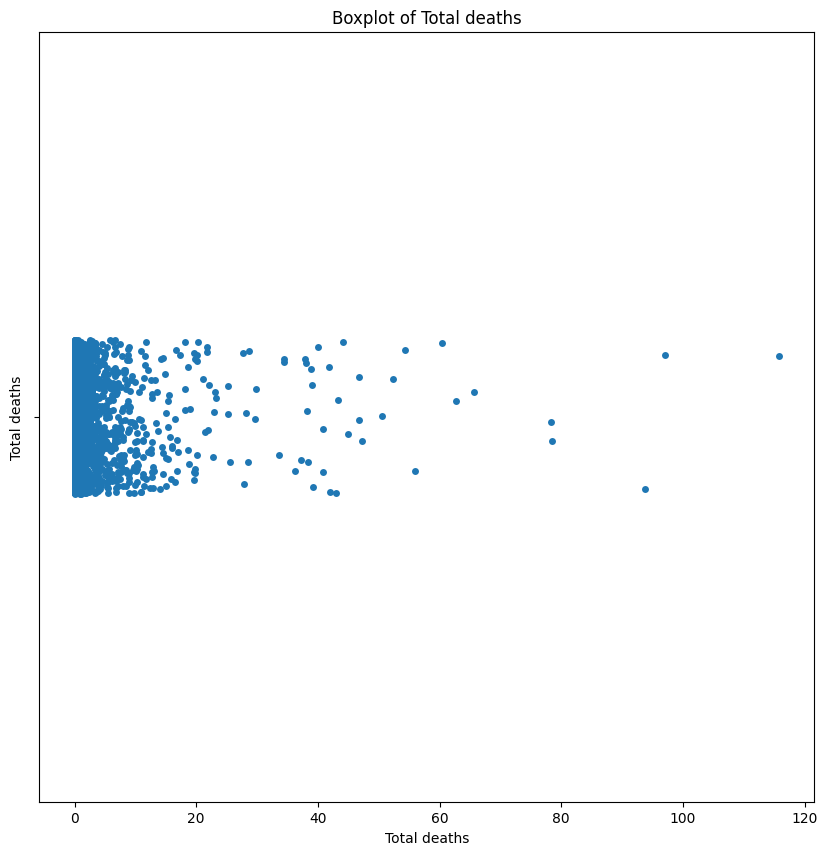

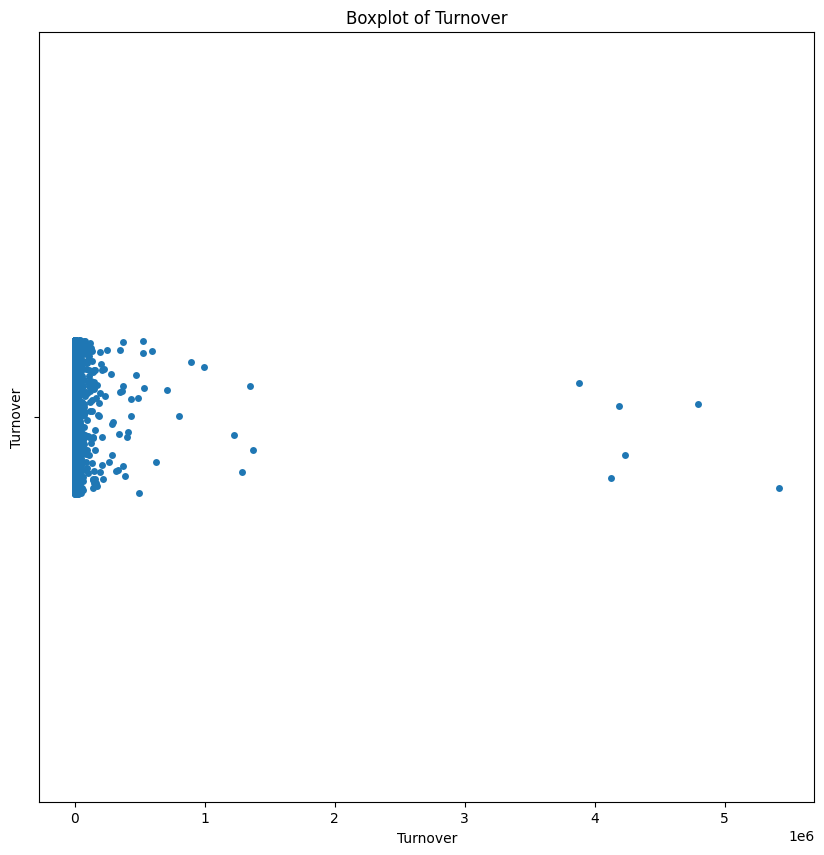

In [43]:
# Filter out entries for London

def stripplotter(df, cols):
    for col in cols:
        plt.figure(figsize=(10, 10))
        sns.stripplot(data=df[df['Area'] != 'London'], x=col)
        plt.title(f'Boxplot of {col}')
        plt.ylabel(col)
        plt.show()
        plt.tight_layout

columns_to_describe = ['Total jobs', 'Total organisations', "Total births", "Total deaths", 'Turnover']

stripplotter(master_df, columns_to_describe)





Total Jobs

clearly visible cluster between 10000 to 12000 represnts Hounslow.

In [44]:
# remove null values in the SIC dataset.


# **Exploratory Visualisation**

Heatmaps showing the distribution of SIC codes by area as a proportion of the number of bussinesses and the number of jobs. This can help to make disernments in the lower graularity data below.

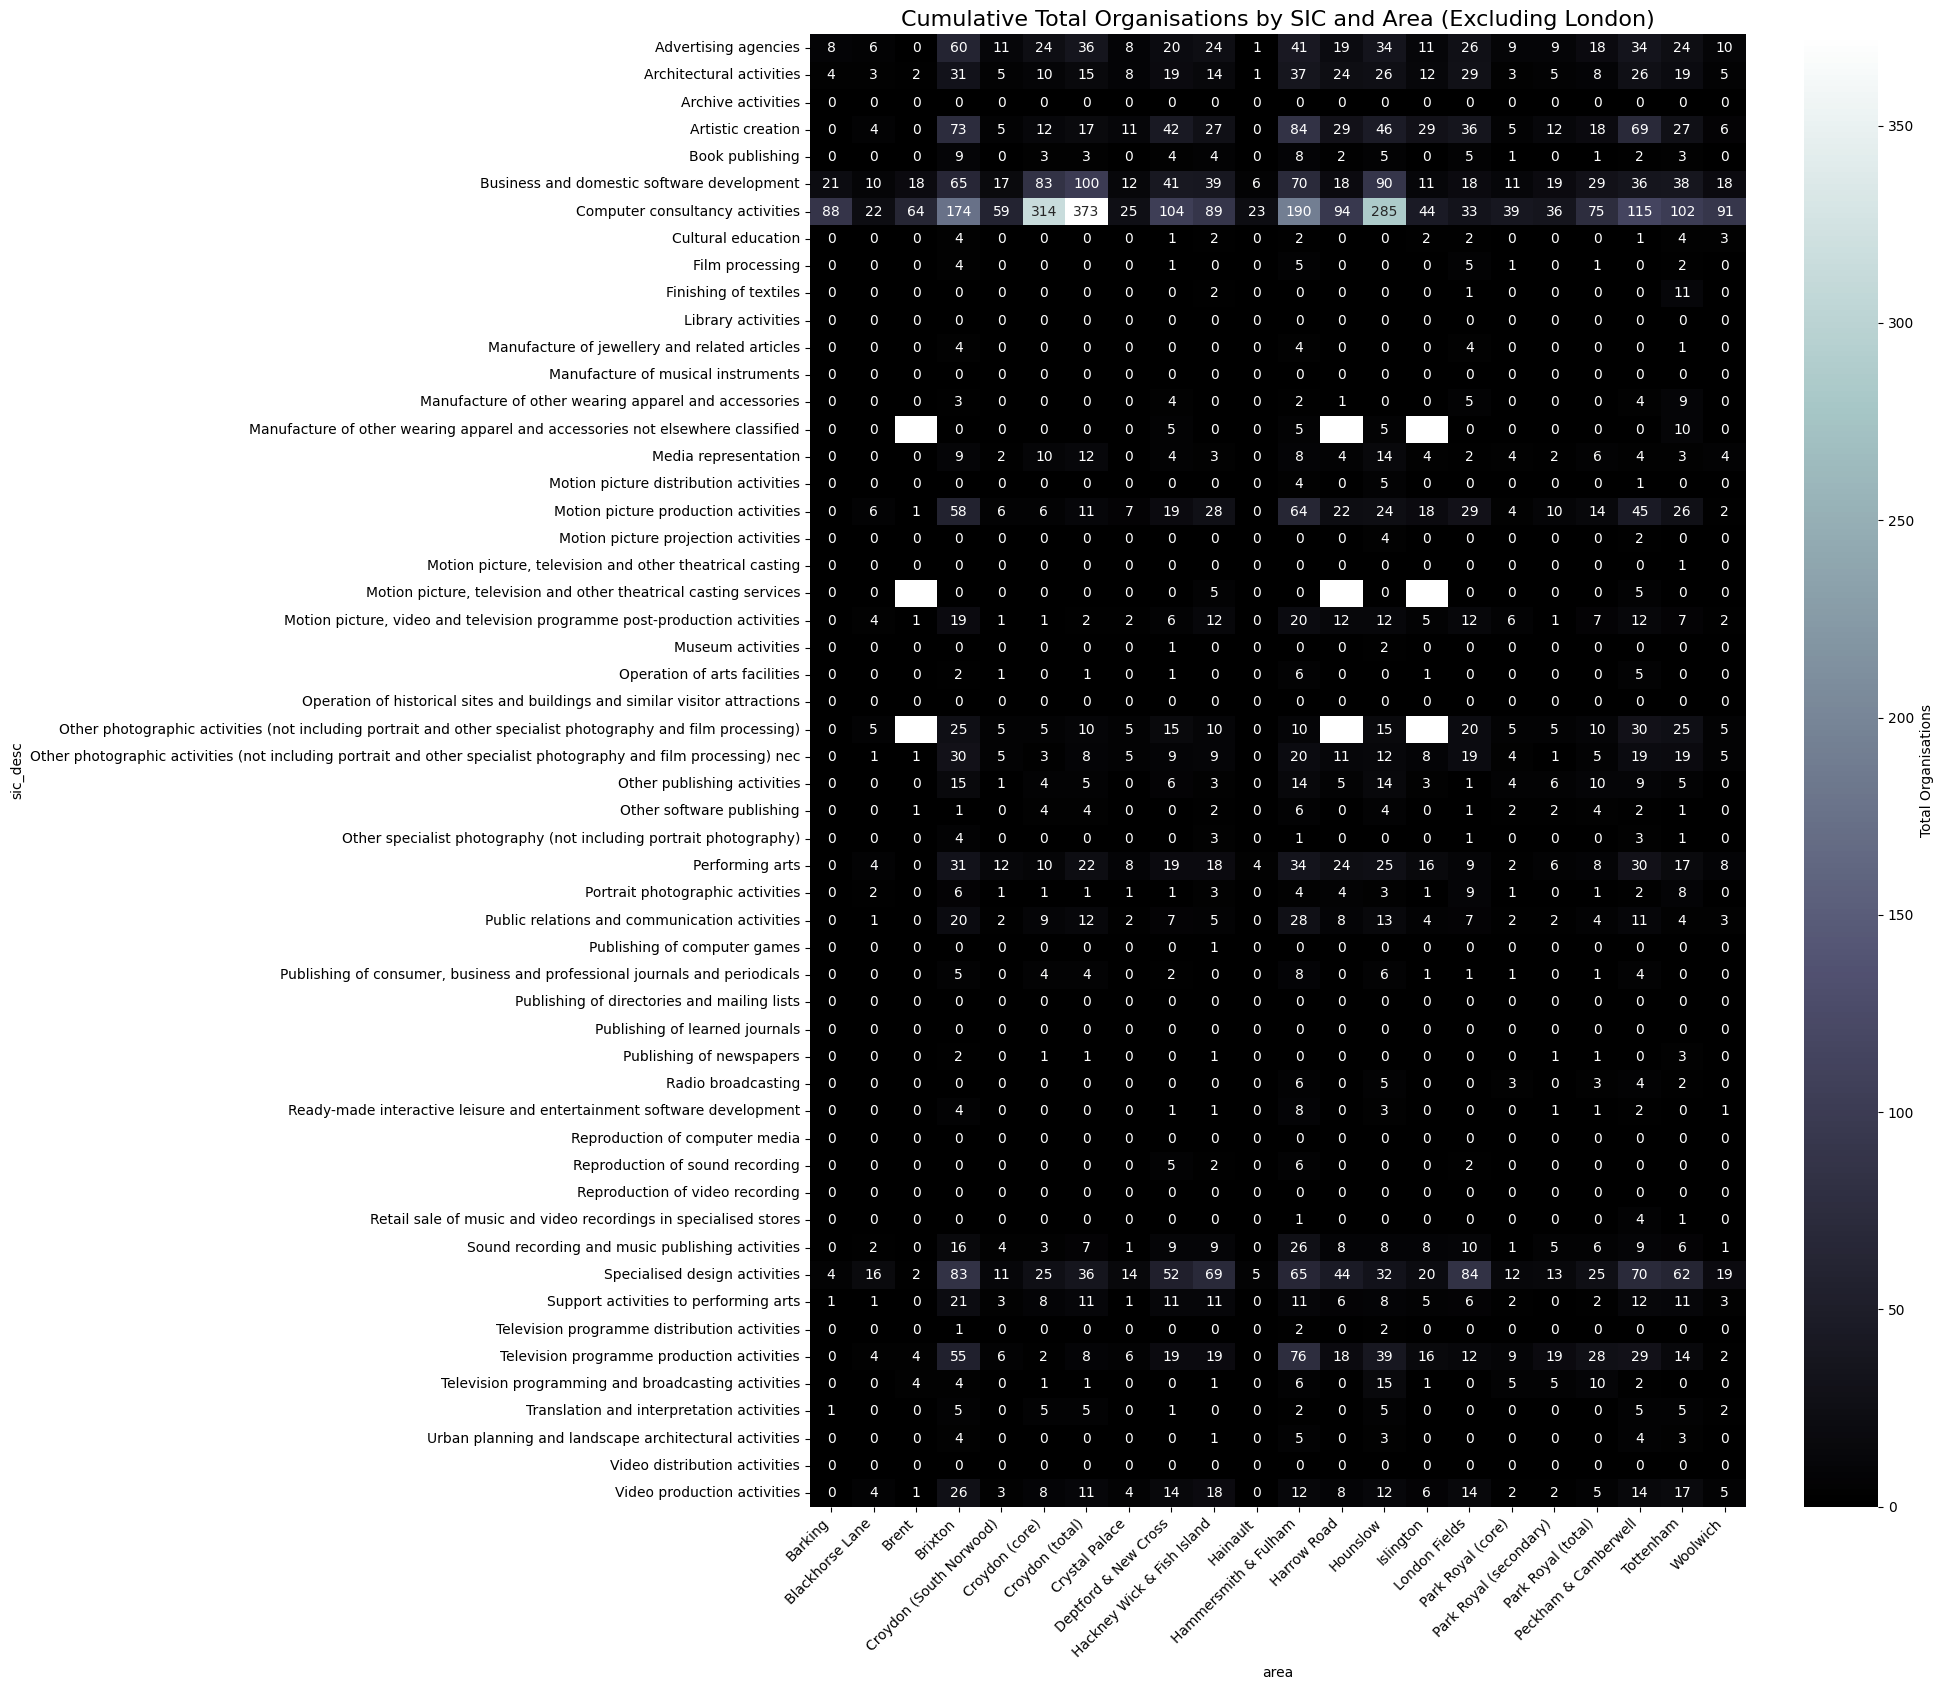

In [45]:
# heatmap for SIC codes x area x biz
#remove these null values.


df_sicab = df_jobs_SIC[(df_jobs_SIC['area'] != 'London')].pivot_table(values='sum_biz', index='sic_desc', columns='area')

plt.figure(figsize=(20, 17))

heatmap = sns.heatmap(df_sicab,
                      cmap='bone',
                      annot=True,
                      fmt='.0f',
                      cbar_kws={'label': 'Total Organisations'})


plt.xticks(rotation=45, ha='right')

plt.title('Cumulative Total Organisations by SIC and Area (Excluding London)', fontsize=16)

plt.tight_layout()

plt.show()

Heatmaps showing the distribution of subsectors by area as a numeric of the number of deaths, births. Because these are not organised by year they should be taken as a cumulative count of the total number of jobs per area and subsector for the period 2015-2022.

The heatmap showing the numer of jobs per area and subsector does not include London. This have been filtered out from the visualization because they are an aggregate catergory, and an outliying catergory, respectivley.  

The IT, Software and Computer Services & Screen Digital have been removed from these plots and will be treated in the following section.

the key scale has been adjusted for precision. 'bone' has been used because 0 being black makes for easier visual discrimination.

In [46]:
# mask to remove values for london and for It and Screen Digital

plot_msk = (master_df['Area'] != 'London') & (master_df['Subsector'] != 'IT, software and computer services') & (master_df['Subsector'] != 'Screen and digital')

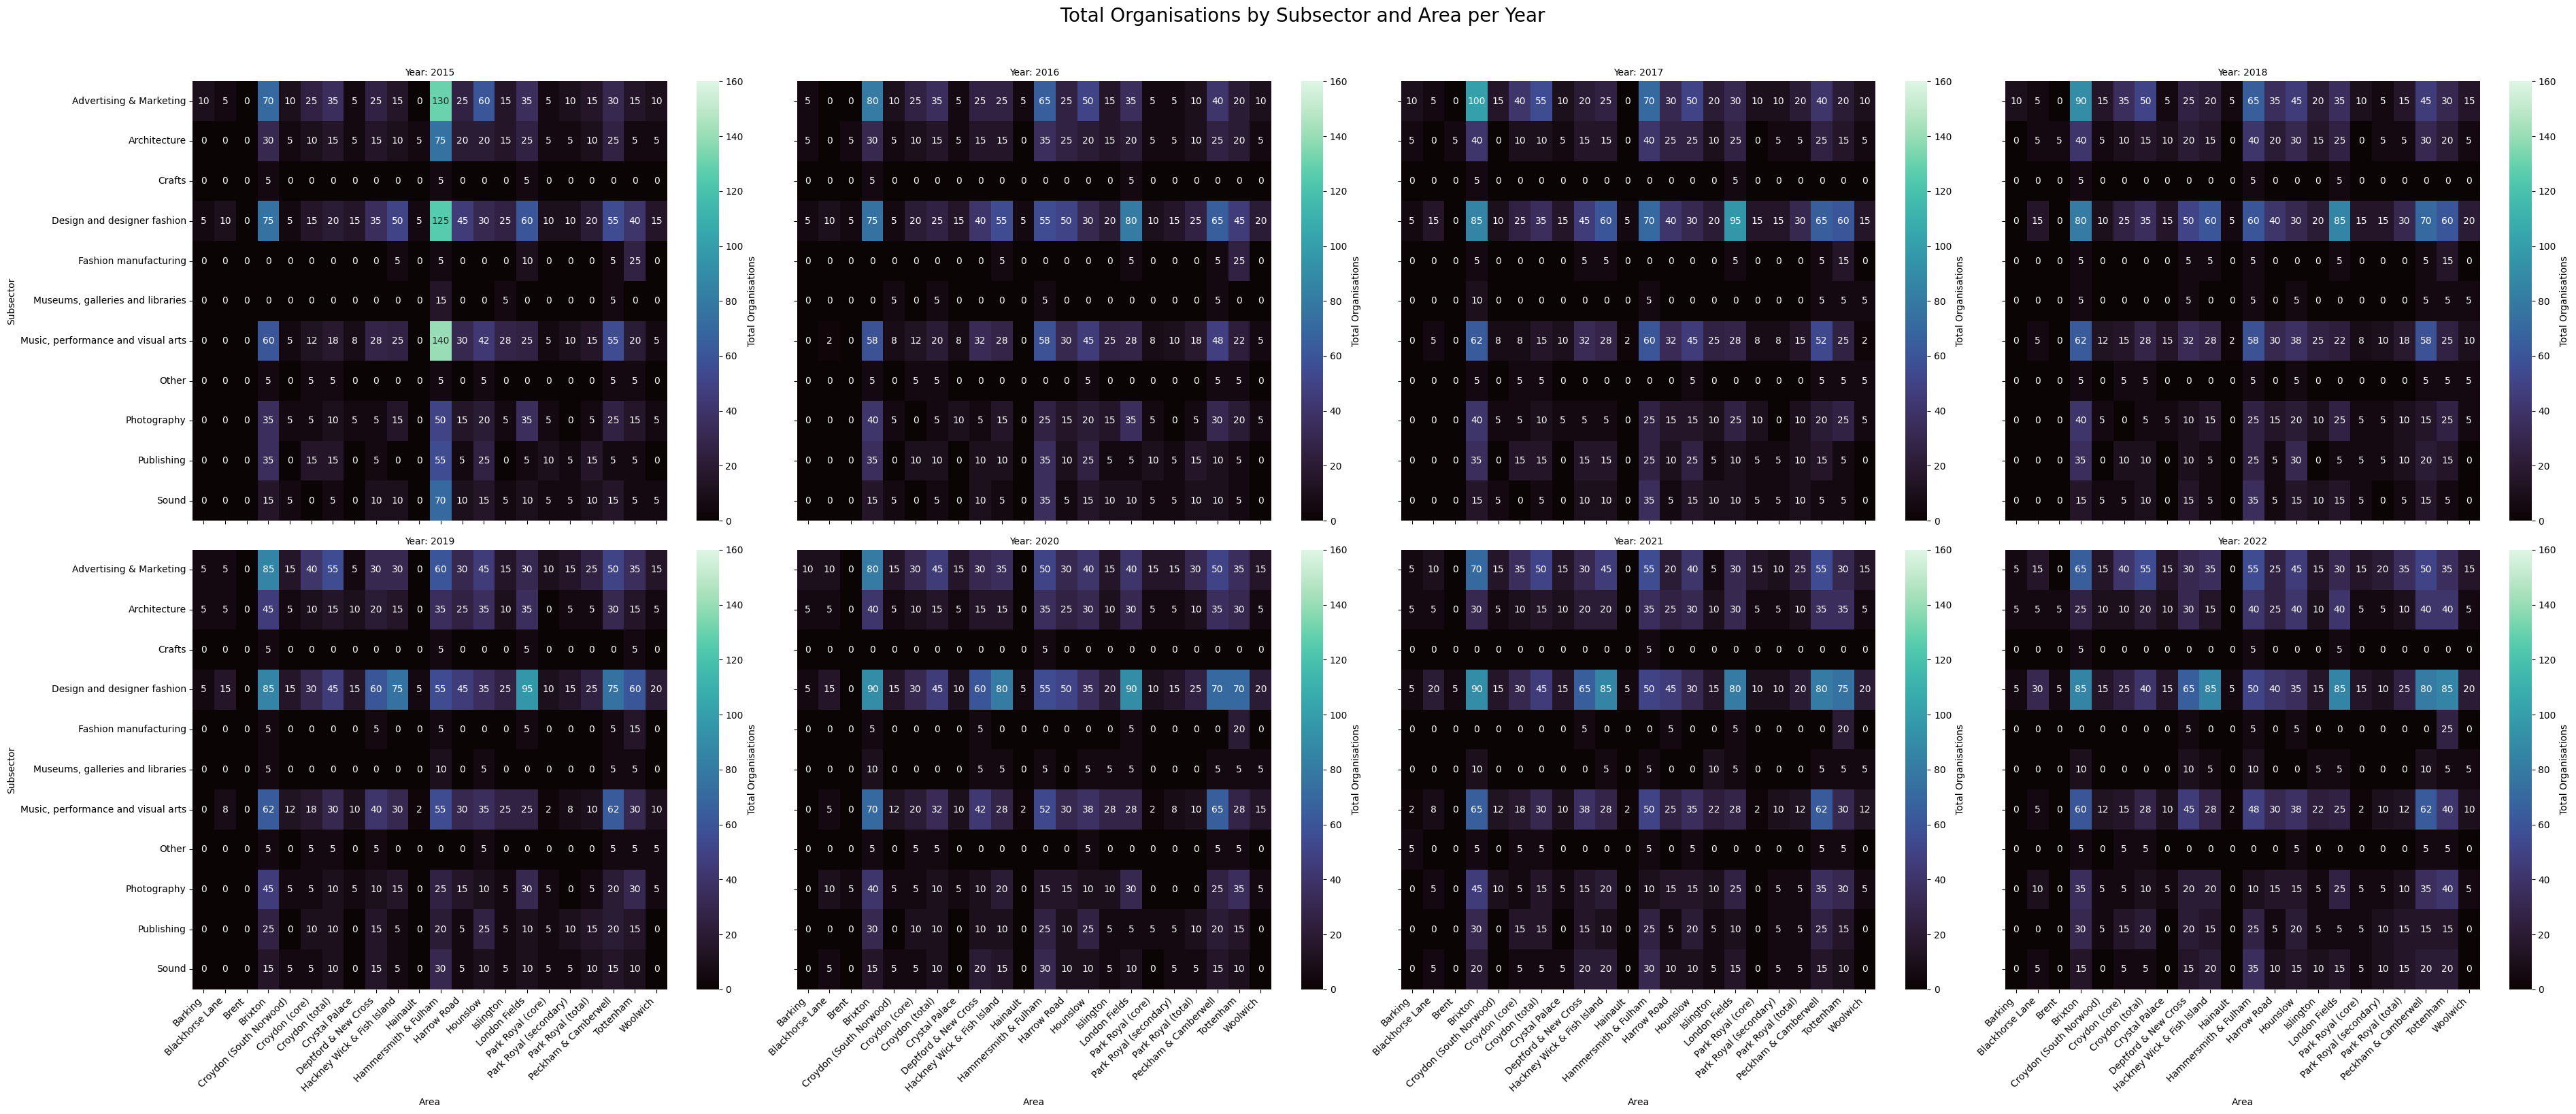

In [47]:
# exclude IT services and place that into another heatmap grid?

years = sorted(master_df['Year'].unique())

g = sns.FacetGrid(master_df[plot_msk],
                  col="Year",
                  col_wrap=4,
                  height=8,
                  aspect=1.2)

def plot_heatmap(data, **kwargs):
    df_pivot = data.pivot_table(values='Total organisations',
                                index='Subsector',
                                columns='Area')
    sns.heatmap(df_pivot,
                cmap='mako',
                annot=True,
                fmt='.0f',
                cbar_kws={'label': 'Total Organisations'},
                vmin= 0,
                vmax = 160,
                **kwargs)
    plt.xticks(rotation=45, ha='right')

g.map_dataframe(plot_heatmap)

g.set_titles("Year: {col_name}")

plt.suptitle(' Total Organisations by Subsector and Area per Year ',
             fontsize=20,
             y=1.02)

plt.tight_layout()

plt.show()

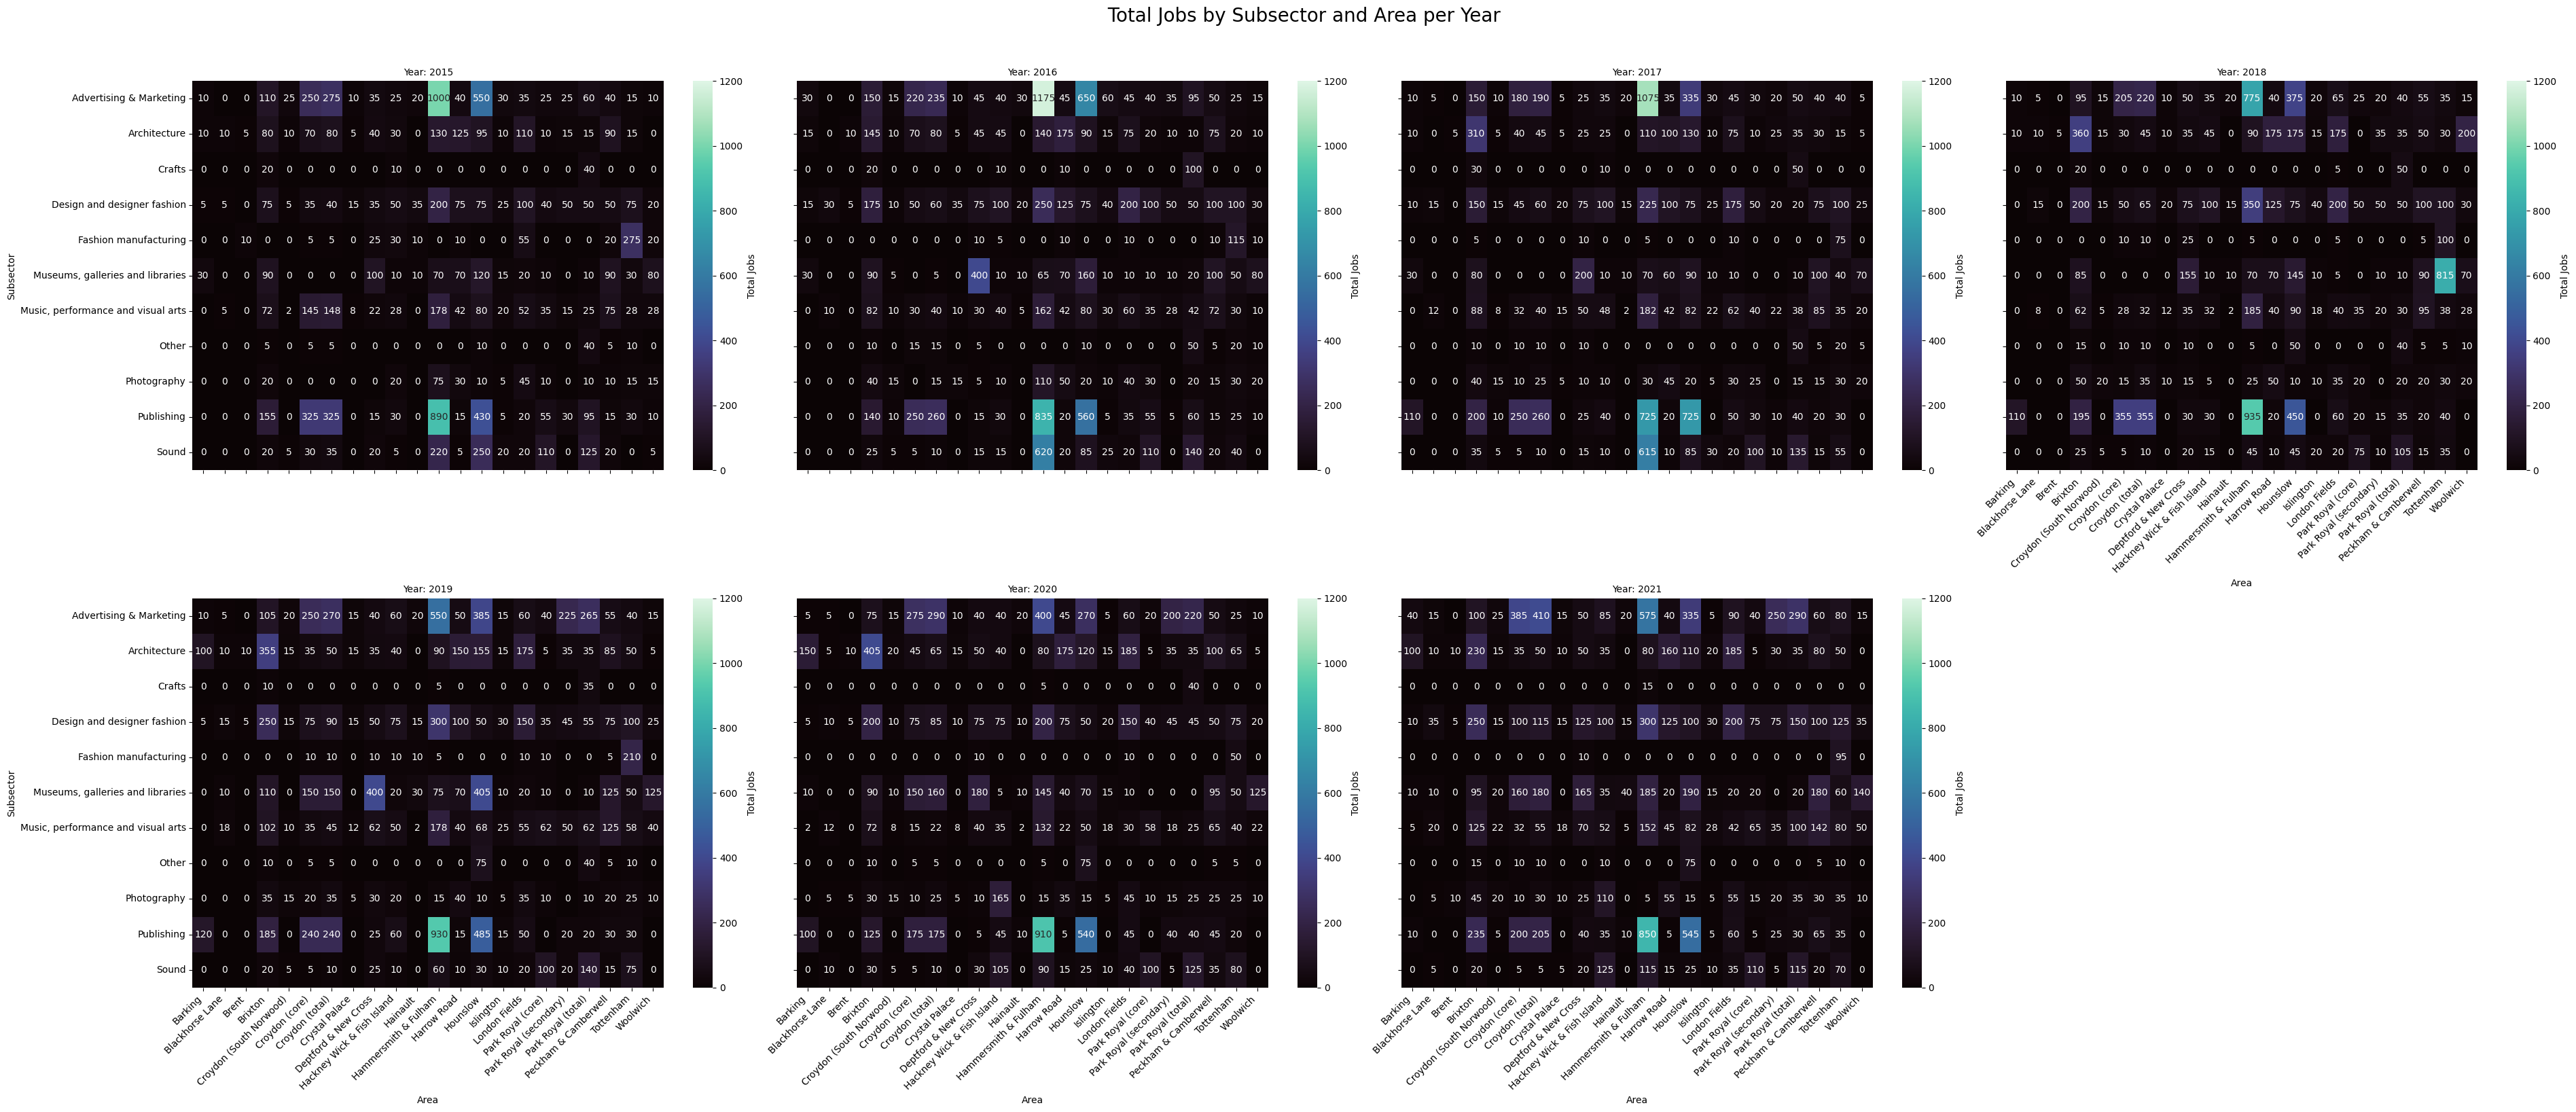

In [48]:
# area x subsector x jobs

#drop year 2022
#remove It and screen digital as these will be dealth with seperately in the next section

plot_msk_z = (master_df['Area'] != 'London') & (master_df['Subsector'] != 'IT, software and computer services') & (master_df['Subsector'] != 'Screen and digital') & (master_df['Year'] != 2022)

years = sorted(master_df['Year'].unique())

g = sns.FacetGrid(master_df[plot_msk_z],
                  col="Year",
                  col_wrap=4,
                  height=8,
                  aspect=1.2)

def plot_heatmap(data, **kwargs):
    df_pivot = data.pivot_table(values='Total jobs',
                                index='Subsector',
                                columns='Area')
    sns.heatmap(df_pivot,
                cmap='mako',
                annot=True,
                fmt='.0f',
                cbar_kws={'label': 'Total Jobs'},
                vmin= 0,
                vmax = 1200,
                **kwargs)
    plt.xticks(rotation=45, ha='right')

g.map_dataframe(plot_heatmap)

g.set_titles("Year: {col_name}")

plt.suptitle(' Total Jobs by Subsector and Area per Year',
             fontsize=20,
             y=1.02)

plt.tight_layout()

plt.show()

In [49]:
# pointplot for total number of jobs 2015 & 2021

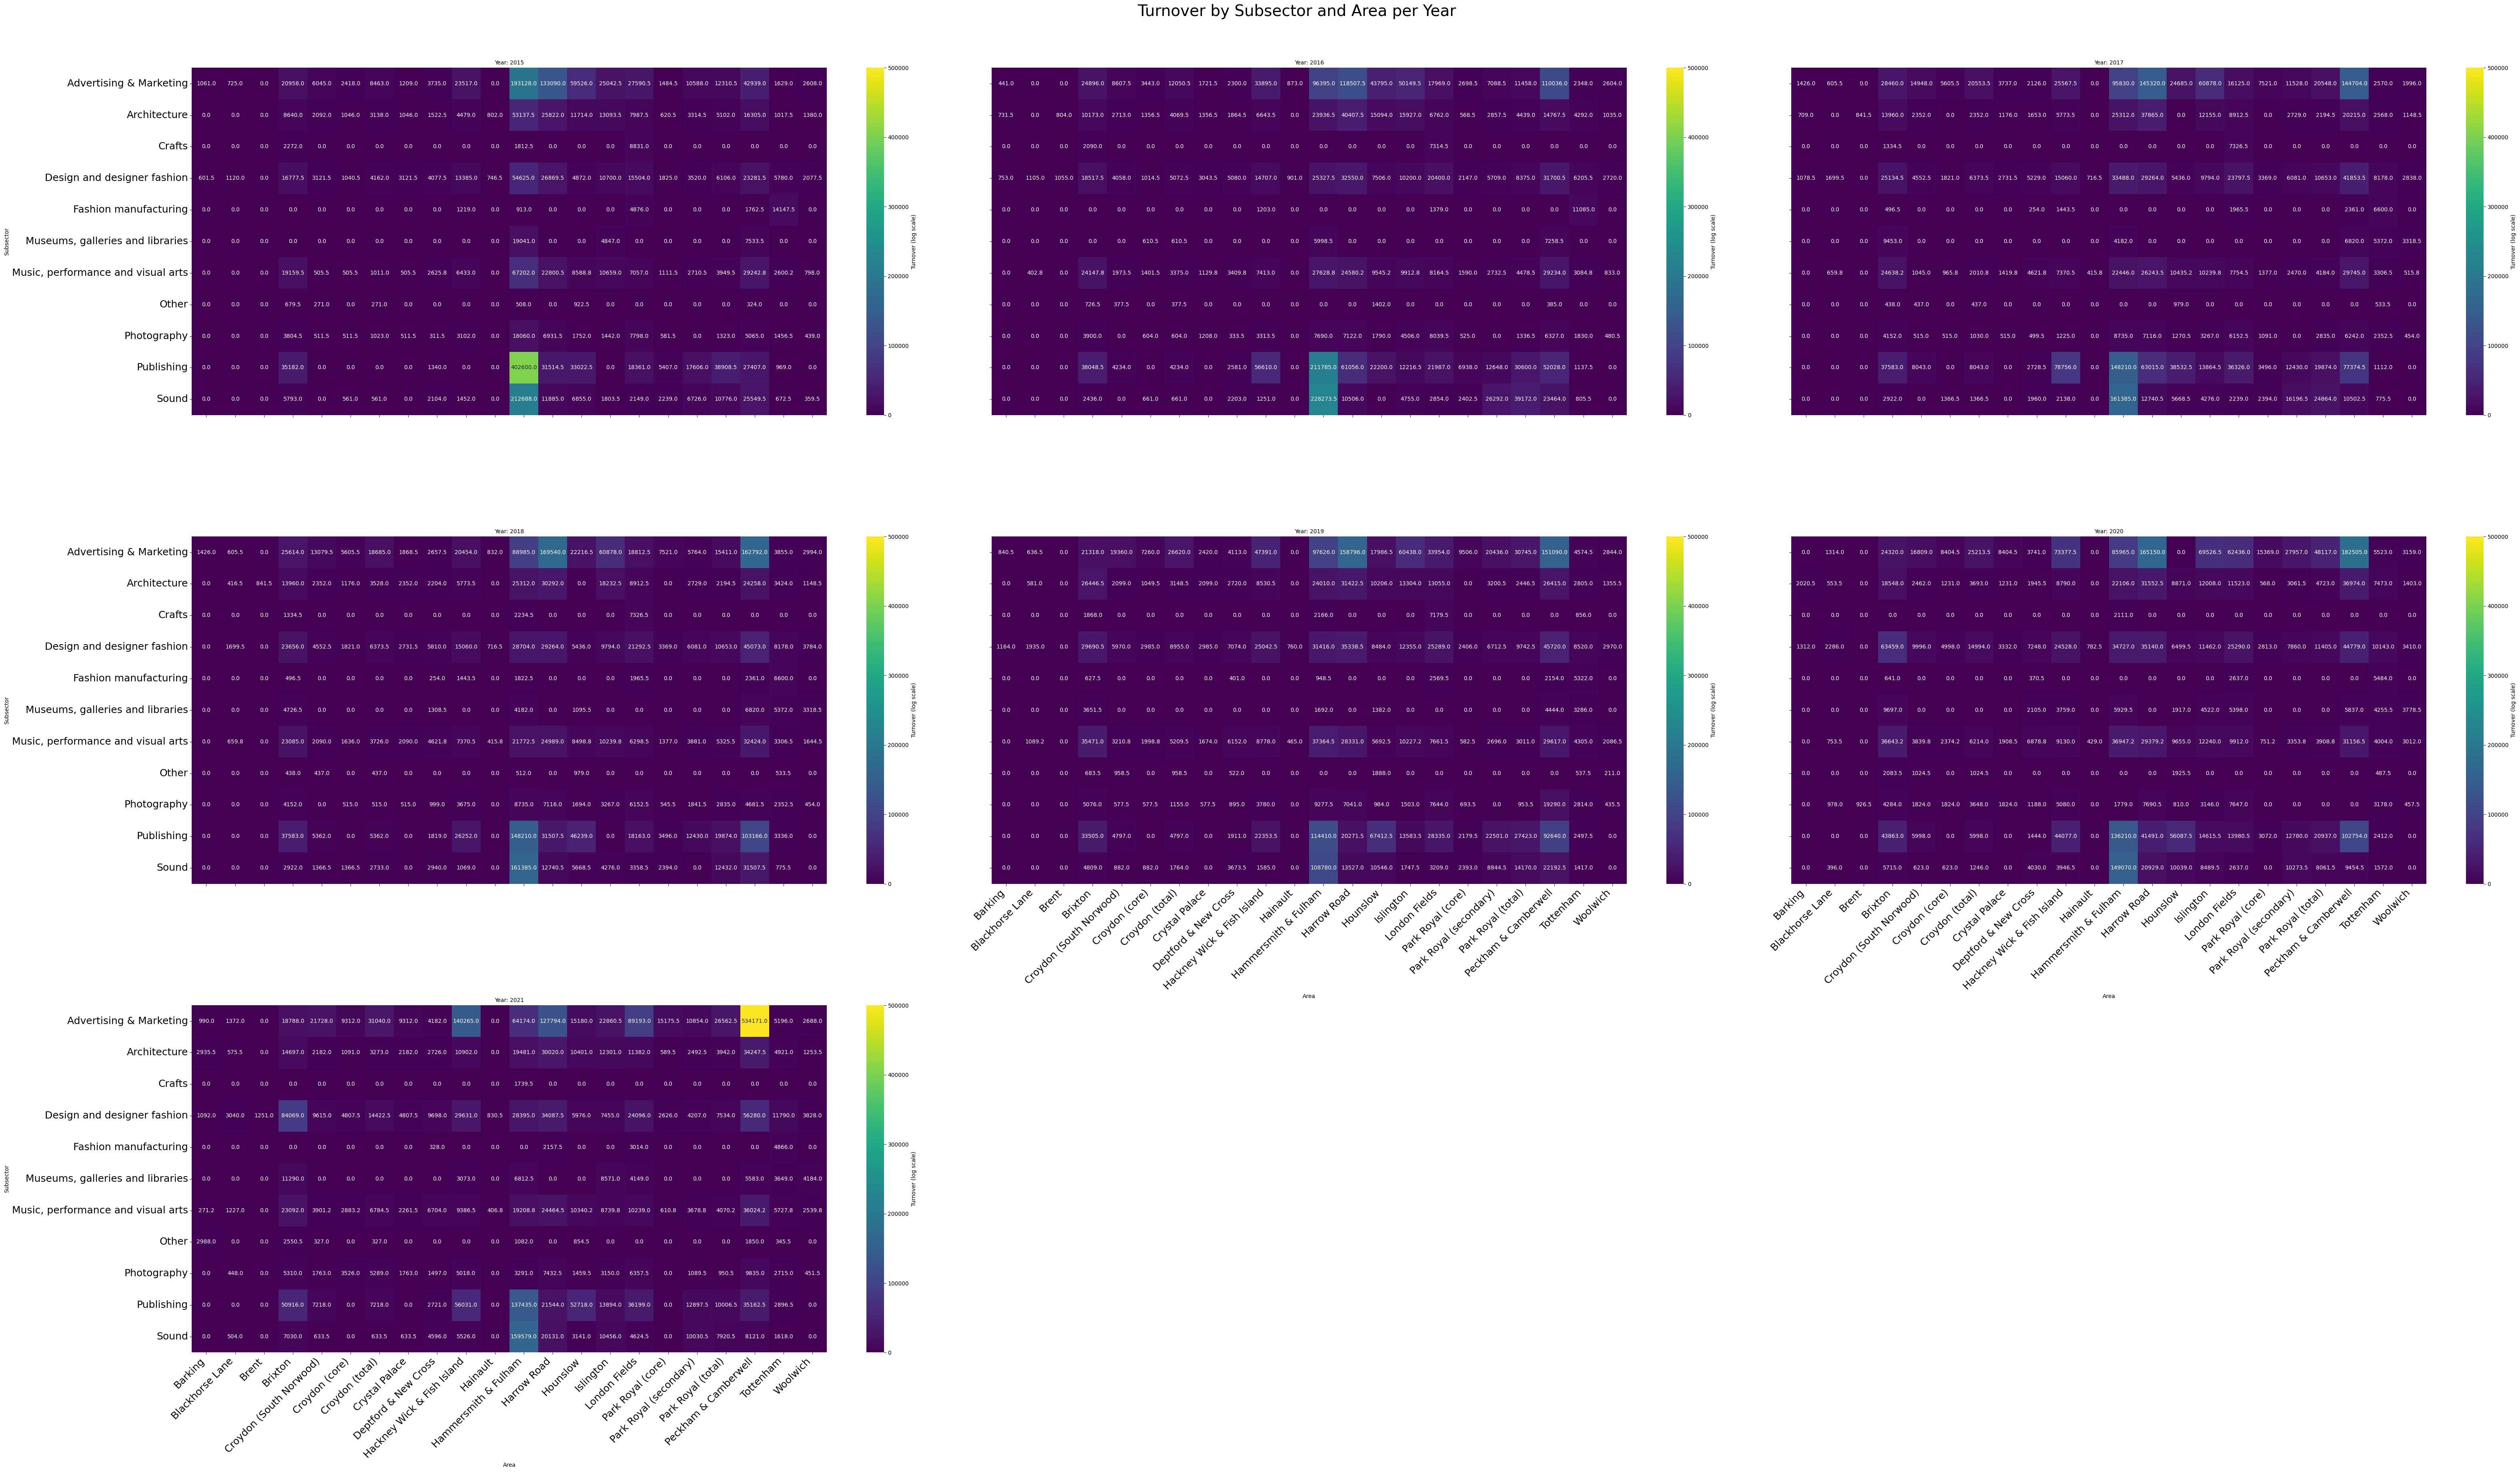

In [50]:
# area x subsector x Turnover

#drop year 2022
#remove It and screen digital as these will be dealth with seperately in the next section

# logarithmic scale seems to work best here with viridis.

plot_msk_z = (master_df['Area'] != 'London') & (master_df['Subsector'] != 'IT, software and computer services') & (master_df['Subsector'] != 'Screen and digital') & (master_df['Year'] != 2022)

years = sorted(master_df['Year'].unique())

g = sns.FacetGrid(master_df[plot_msk_z],
                  col="Year",
                  col_wrap=3,
                  height=12,
                  aspect=1.8)

def plot_heatmap(data, **kwargs):
    df_pivot = data.pivot_table(values='Turnover',
                                index='Subsector',
                                columns='Area')
    sns.heatmap(df_pivot,
                cmap='viridis',
                annot=True,
                fmt='.1f',
                cbar_kws={'label': 'Turnover (log scale)'},
                vmin= 0,
                vmax = 500000,
                **kwargs)
    plt.xticks(rotation=45, ha='right', fontsize=18)
    plt.yticks(rotation=0, fontsize=18)

g.map_dataframe(plot_heatmap)

g.set_titles("Year: {col_name}")

plt.suptitle(' Turnover by Subsector and Area per Year',
             fontsize=28,
             y=1.02)

plt.tight_layout()

plt.show()

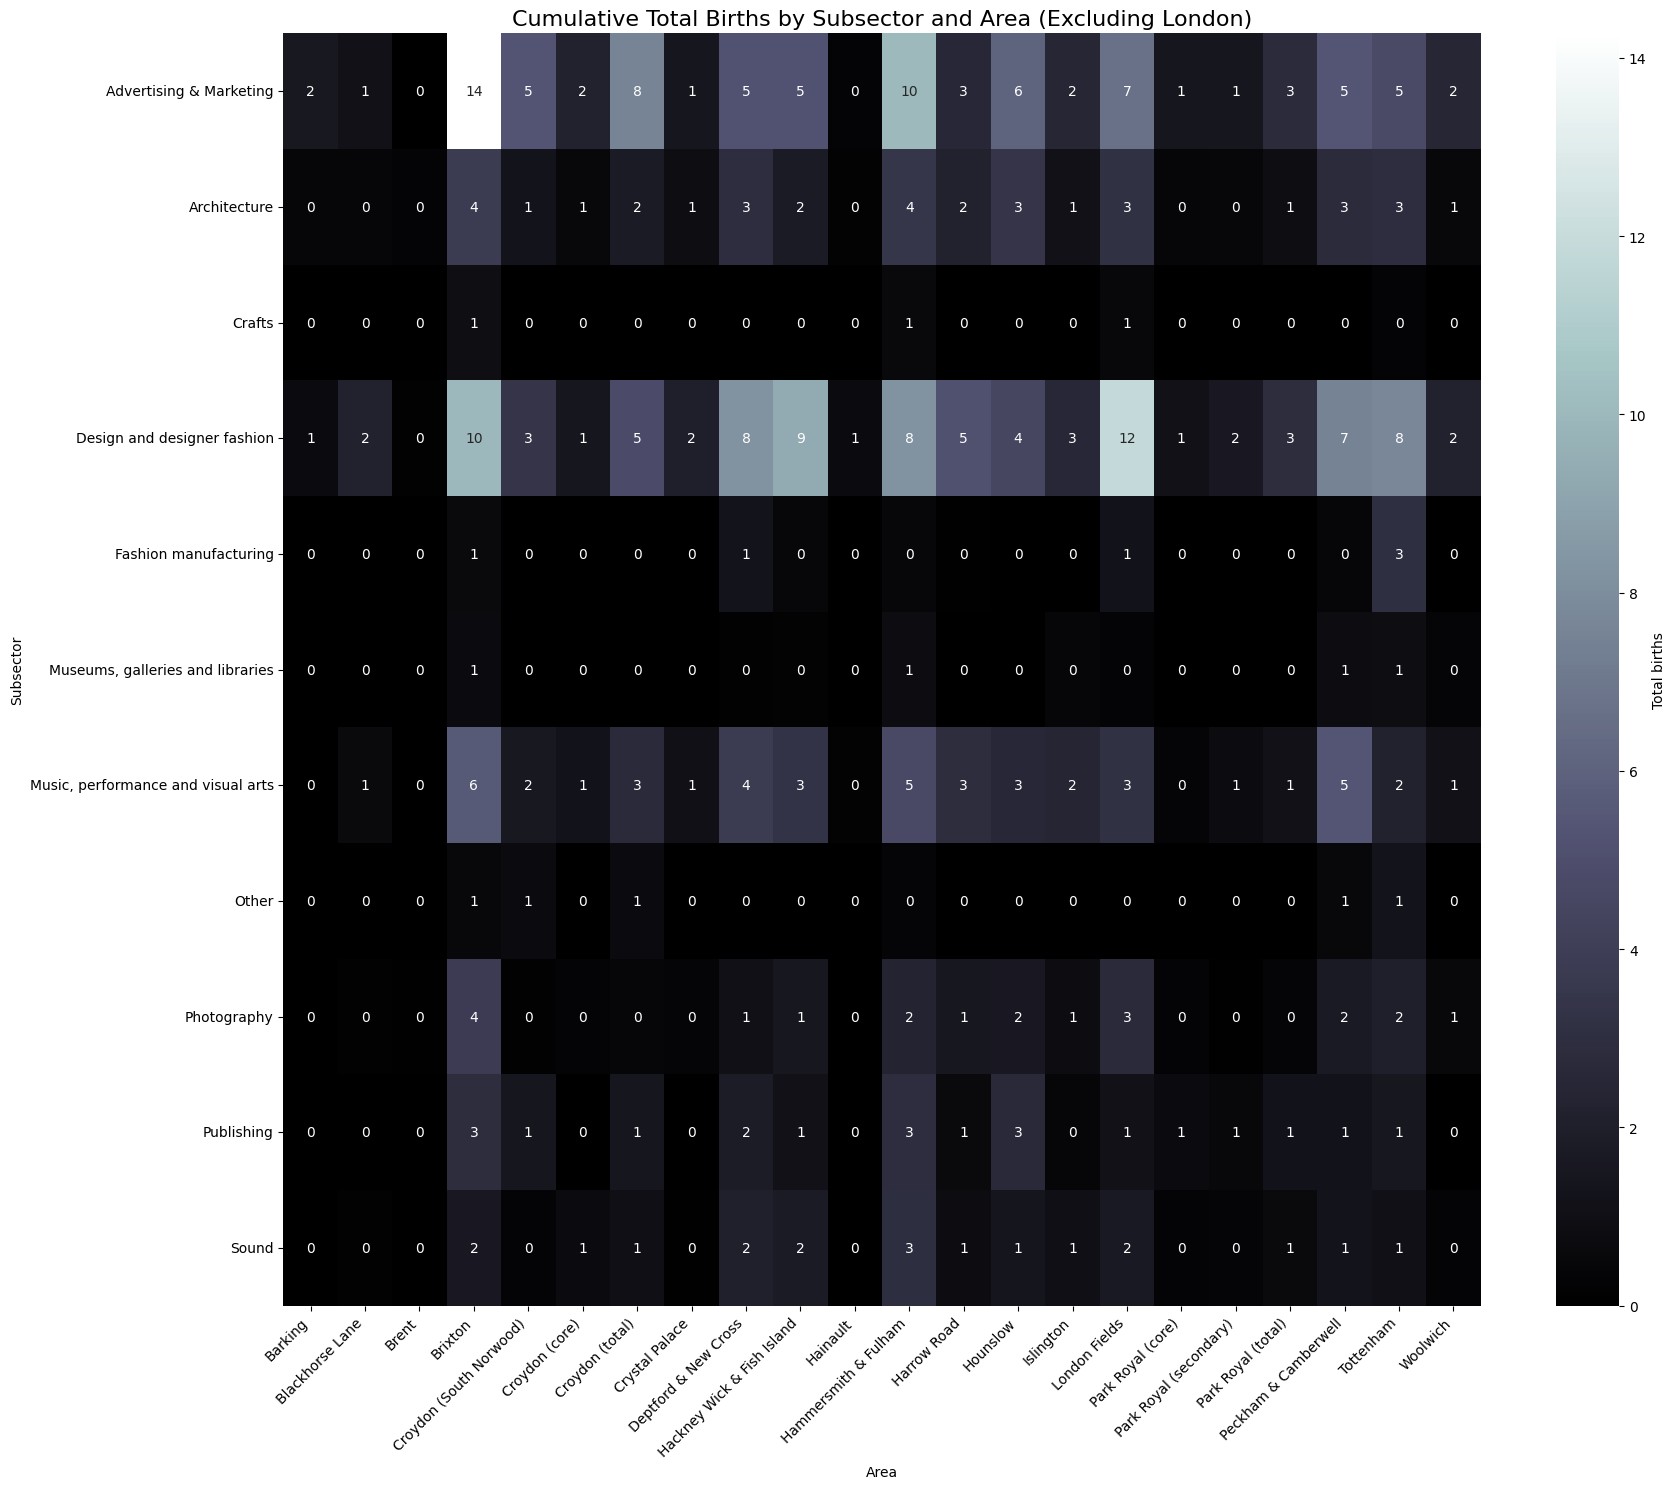

In [51]:
# area x subsector x Total organisations x Total births
 #remove It and screen digital as these will be dealth with seperately in the next section



df_sab = master_df[plot_msk].pivot_table(values='Total births', index='Subsector', columns='Area')

plt.figure(figsize=(18, 15))

heatmap = sns.heatmap(df_sab,
                      cmap='bone',
                      annot=True,
                      fmt='.0f',
                      cbar_kws={'label': 'Total births'})


plt.xticks(rotation=45, ha='right')

plt.title('Cumulative Total Births by Subsector and Area (Excluding London)', fontsize=16)

plt.tight_layout()

plt.show()

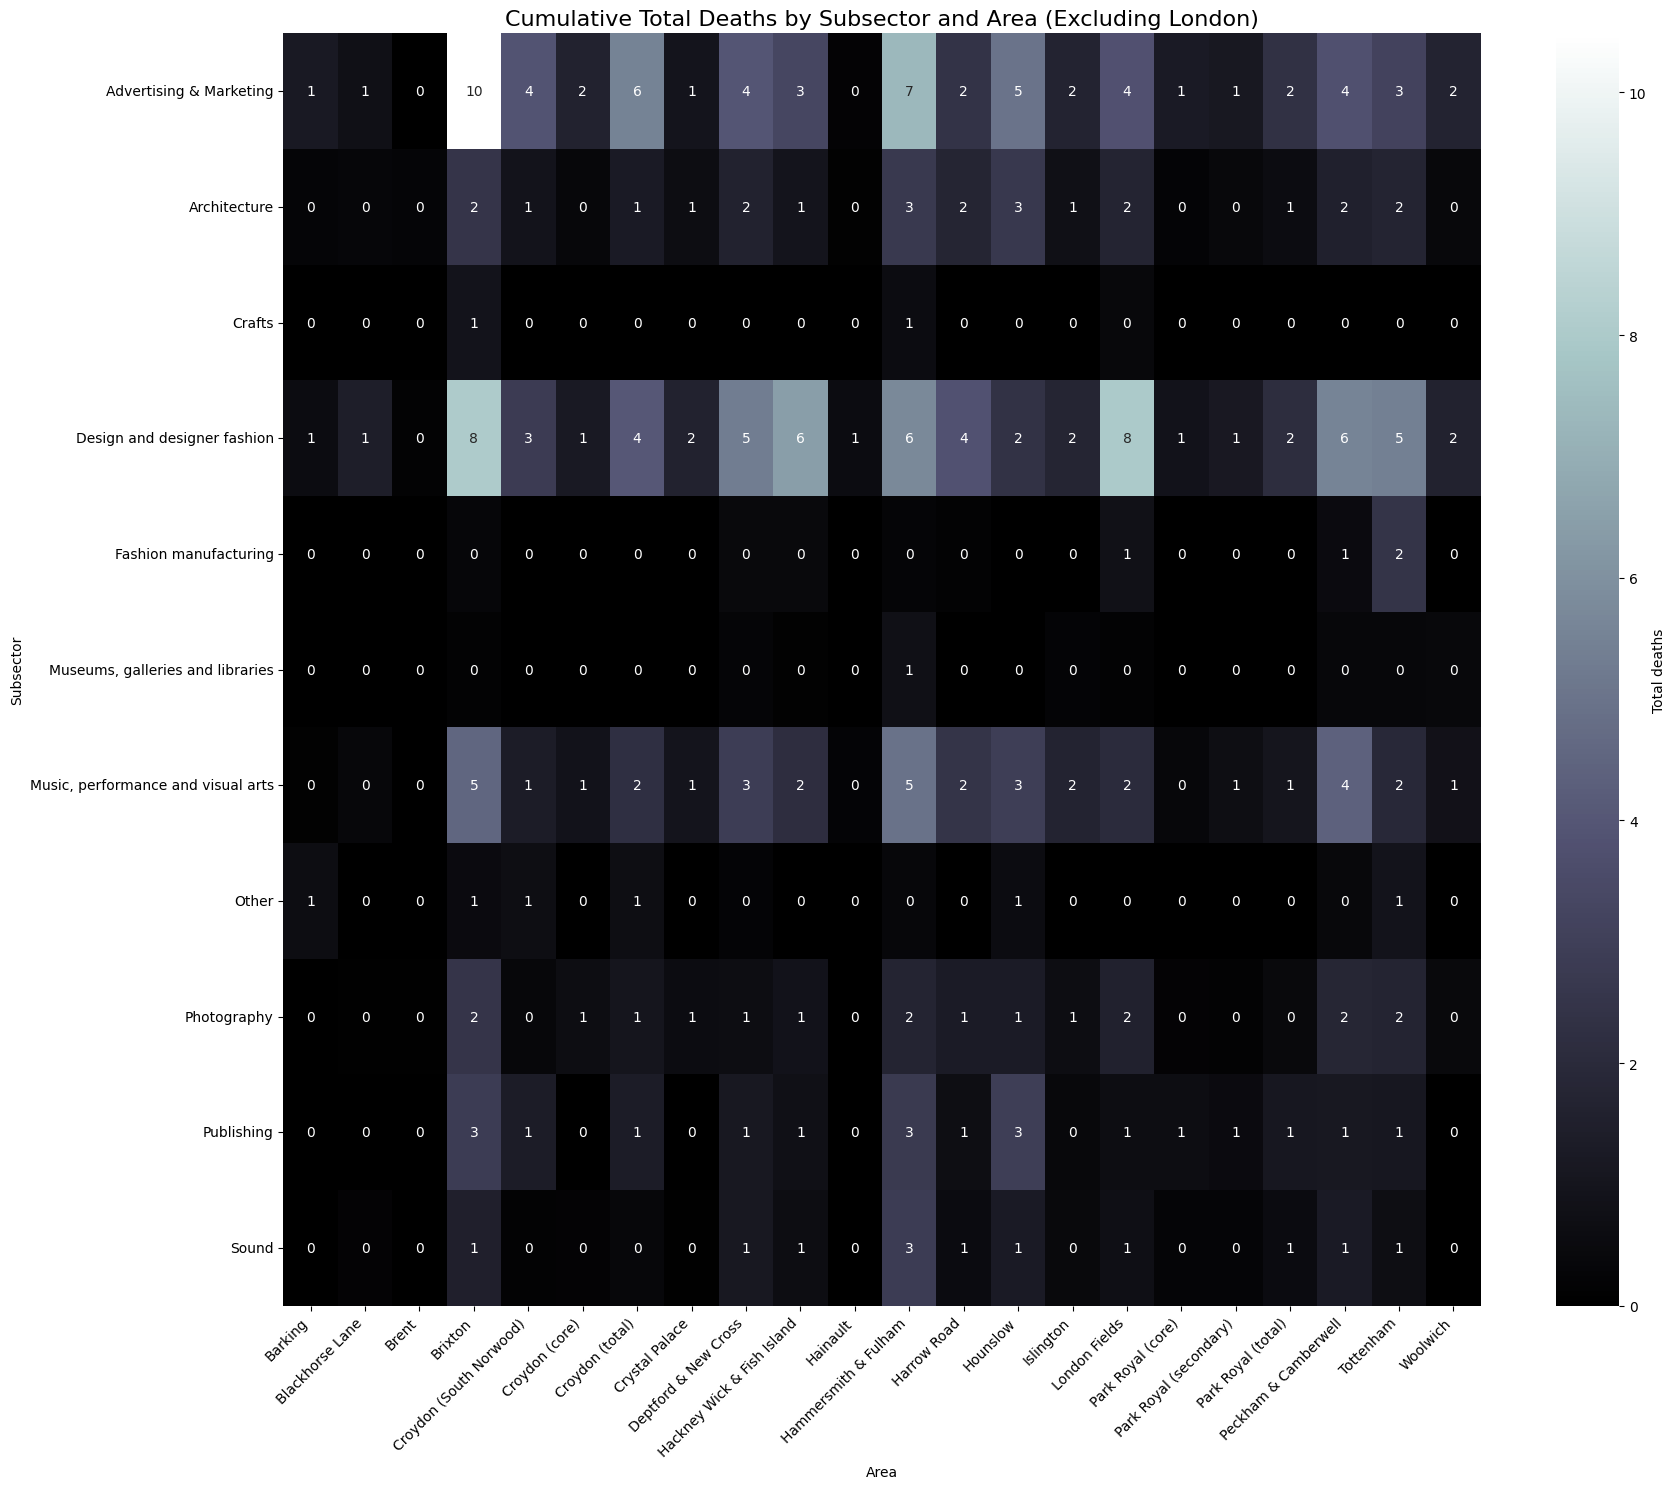

In [52]:
# area x subsector x Total organisations x Total deaths
 #remove It and screen digital as these will be dealth with seperately in the next section



df_sad = master_df[plot_msk].pivot_table(values='Total deaths', index='Subsector', columns='Area')

plt.figure(figsize=(18, 15))

cmap = sns.color_palette("bone", as_cmap=True)


heatmap = sns.heatmap(df_sad,
                      cmap=cmap,
                      annot=True,
                      fmt='.0f',
                      cbar_kws={'label': 'Total deaths'})


plt.xticks(rotation=45, ha='right')

plt.title('Cumulative Total Deaths by Subsector and Area (Excluding London)', fontsize=16)

plt.tight_layout()

plt.show()

# **Data Modelling**

In [53]:
#summary stats organisations 2015 & 2022 : comparison of change

def year_data(df, year):
    year_df = df[(df['Year'] == year) & (df['Area'] != 'London')]
    return year_df.groupby('Area')['Total organisations'].agg(['sum', 'std']).reset_index()

df_2015 = year_data(master_df, 2015)
df_2022 = year_data(master_df, 2022)

df_2015.columns = ['Area', 'Sum Total Organisations 2015', 'Std Total Organisations 2015']
df_2022.columns = ['Area', 'Sum Total Organisations 2022', 'Std Total Organisations 2022']

sum_df = pd.merge(df_2015, df_2022, on='Area', how='outer')
sum_df = sum_df.sort_values('Area').reset_index(drop=True)


sum_df = sum_df.round(1)

sum_df

Area  Sum Total Organisations 2015  \
0                      Barking                           130   
1              Blackhorse Lane                            55   
2                        Brent                            80   
3                      Brixton                           760   
4      Croydon (South Norwood)                           110   
5               Croydon (core)                           515   
6              Croydon (total)                           625   
7               Crystal Palace                            85   
8         Deptford & New Cross                           320   
9   Hackney Wick & Fish Island                           320   
10                    Hainault                            25   
11        Hammersmith & Fulham                          1500   
12                 Harrow Road                           340   
13                    Hounslow                           745   
14                   Islington                           215   
15               London Fields                           330   
16           Park Royal (core)                           115   
17      Park Royal (secondary)                           125   
18          Park Royal (total)                           240   
19        Peckham & Camberwell                           495   
20                   Tottenham                           310   
21                    Woolwich                           160   

    Std Total Organisations 2015  Sum Total Organisations 2022  \
0                           29.5                            90   
1                            8.1                           140   
2                           19.3                            70   
3                           60.9                           720   
4                           15.0                           160   
5                          100.1                           470   
6                          114.8                           630   
7                            9.2                           125   
8                           31.0                           475   
9                           28.8                           480   
10                           4.1                            40   
11                         112.7                           710   
12                          28.8                           315   
13                          90.8                           700   
14                          16.4                           200   
15                          21.3                           380   
16                          10.3                           145   
17                          11.9                           190   
18                          21.8                           335   
19                          37.9                           635   
20                          28.9                           595   
21                          23.7                           180   

    Std Total Organisations 2022  
0                           19.2  
1                           12.4  
2                           14.1  
3                           52.0  
4                           16.6  
5                           76.5  
6                           92.3  
7                           10.5  
8                           32.1  
9                           40.9  
10                           7.8  
11                          59.6  
12                          22.8  
13                          81.2  
14                          14.2  
15                          26.3  
16                          14.5  
17                          17.4  
18                          31.7  
19                          42.9  
20                          39.4  
21                          21.4

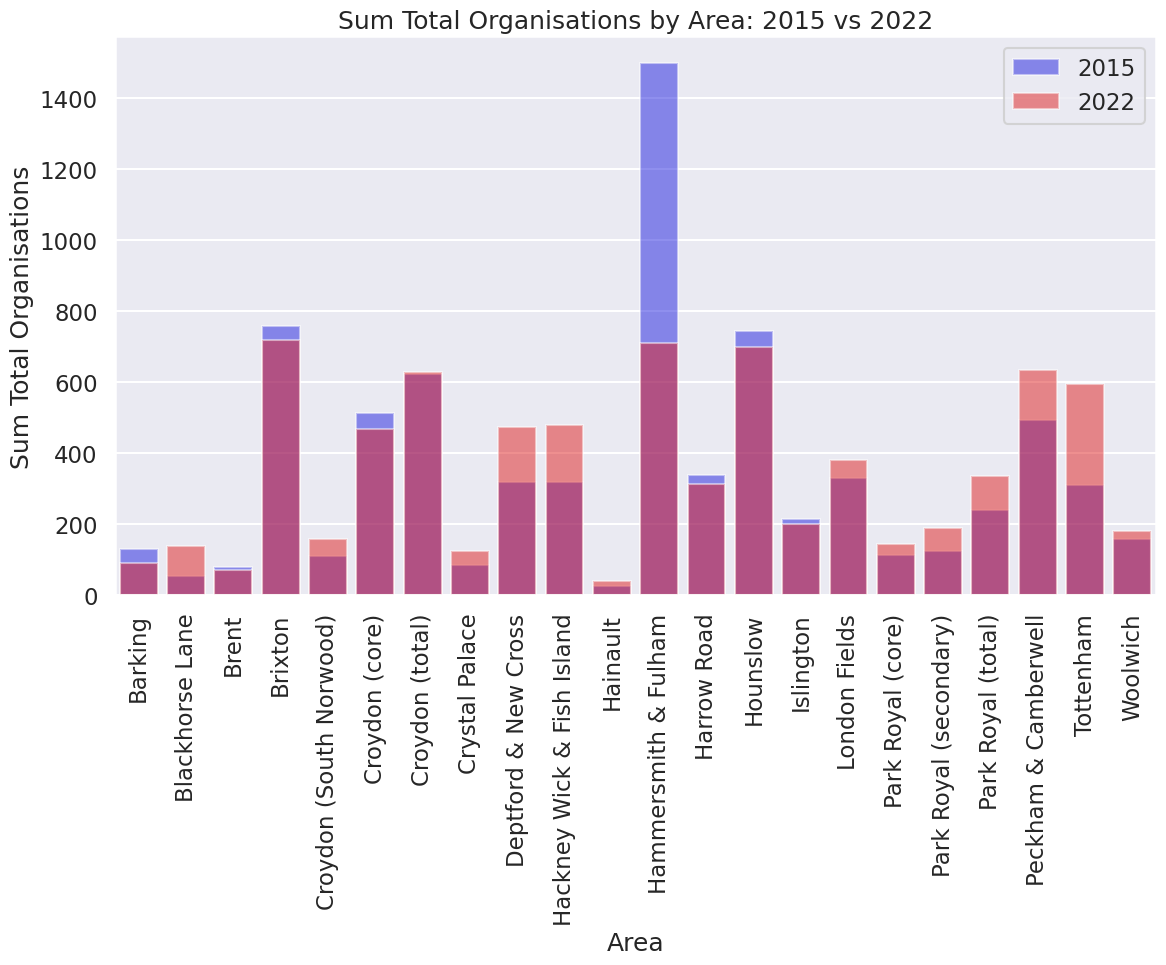

In [54]:
sns.set_theme(context="talk")


plt.figure(figsize=(12, 10))

sns.barplot(x='Area', y='Sum Total Organisations 2015', data=sum_df, color='blue', alpha=0.5, label='2015')
sns.barplot(x='Area', y='Sum Total Organisations 2022', data=sum_df, color='red', alpha=0.5, label='2022')

plt.title('Sum Total Organisations by Area: 2015 vs 2022')
plt.xticks(rotation=90)
plt.ylabel('Sum Total Organisations')
plt.legend()

plt.tight_layout()

plt.show()

In [55]:
# Group by Area and Year, calculate mean for Total organisations

sum_df = master_df.groupby(['Year'])['Total organisations'].agg(['sum']).reset_index()
sum_df = sum_df.pivot( columns='Year', values='sum')
sum_df.columns = [f' {year}' for year in sum_df.columns]
sum_df = sum_df.round(1)
sum_df = sum_df.sum().to_frame().reset_index()
sum_df.columns = ['Year', 'Sum']
sum_df

Year       Sum
0   2015   94325.0
1   2016  101220.0
2   2017  106080.0
3   2018  107065.0
4   2019  111200.0
5   2020  111950.0
6   2021  107375.0
7   2022  102385.0

In [56]:
def year_data(df, year):
    year_df = df[(df['Year'] == year)]
    return year_df.groupby('Subsector')['Total organisations'].agg(['sum', 'std']).reset_index()

df_2015 = year_data(master_df, 2015)
df_2022 = year_data(master_df, 2022)

df_2015.columns = ['Subsector', 'Sum Total Organisations 2015', 'Std Total Organisations 2015']
df_2022.columns = ['Subsector', 'Sum Total Organisations 2022', 'Std Total Organisations 2022']

sum_df = pd.merge(df_2015, df_2022, on='Subsector', how='outer')
sum_df = sum_df.sort_values('Subsector').reset_index(drop=True)



sum_df

Subsector  Sum Total Organisations 2015  \
0              Advertising & Marketing                          7340   
1                         Architecture                          4075   
2                               Crafts                           455   
3          Design and designer fashion                          7560   
4                Fashion manufacturing                           470   
5   IT, software and computer services                         37670   
6     Museums, galleries and libraries                           785   
7   Music, performance and visual arts                         13335   
8                                Other                           480   
9                          Photography                          2820   
10                          Publishing                          2900   
11                  Screen and digital                         14125   
12                               Sound                          2310   

    Std Total Organisations 2015  Sum Total Organisations 2022  \
0                    1410.894020                          8615   
1                     783.368058                          4885   
2                      91.620242                           540   
3                    1430.603192                          8810   
4                      87.281064                           565   
5                    7196.496753                         37635   
6                     158.269421                          1125   
7                    1322.250392                         13800   
8                      92.486512                           575   
9                     531.498460                          2755   
10                    561.254594                          3055   
11                   1734.994581                         17085   
12                    438.299693                          2940   

    Std Total Organisations 2022  
0                    1662.383224  
1                     932.591538  
2                     109.341363  
3                    1655.240809  
4                     109.221554  
5                    7278.017996  
6                     220.443543  
7                    1351.511500  
8                     113.377888  
9                     513.549321  
10                    588.031821  
11                   2111.370714  
12                    565.144443

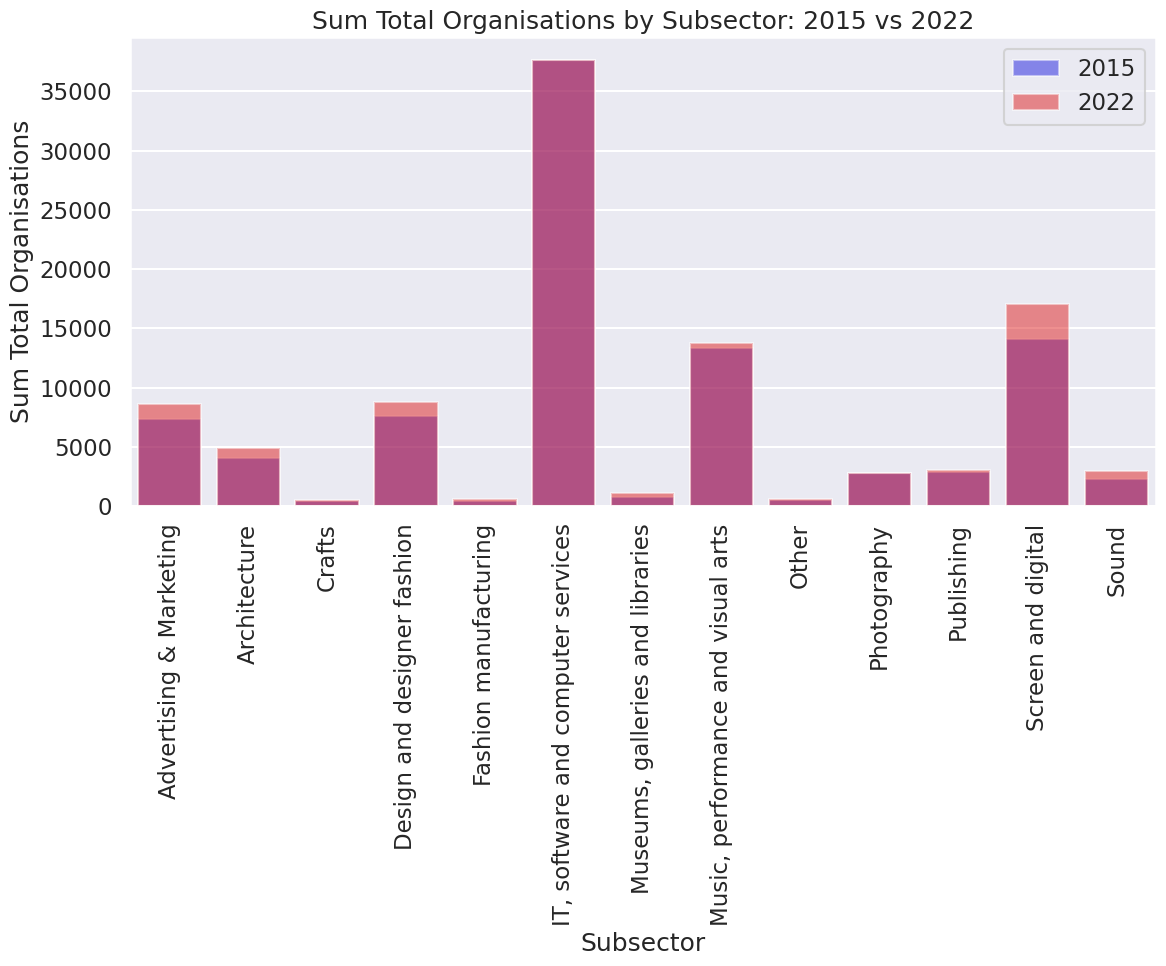

In [57]:
sns.set_theme(context="talk")


plt.figure(figsize=(12, 10))

sns.barplot(x='Subsector', y='Sum Total Organisations 2015', data=sum_df, color='blue', alpha=0.5, label='2015')
sns.barplot(x='Subsector', y='Sum Total Organisations 2022', data=sum_df, color='red', alpha=0.5, label='2022')

plt.title('Sum Total Organisations by Subsector: 2015 vs 2022')
plt.xticks(rotation=90)
plt.ylabel('Sum Total Organisations')
plt.legend()

plt.tight_layout()

plt.show()

# **Reporting and Evaluation**

In [58]:
# dataframes for comparator and CEZ area types

df_CEZ = master_df[master_df['Area type'].str.contains('CEZ')]
print(df_CEZ.head())
print(df_CEZ.describe())

                             Area Area type     Activity  \
Unique ID                                                  
#120blacmuse2015  Blackhorse Lane  CEZ 2022  Consumption   
#121blacmuse2016  Blackhorse Lane  CEZ 2022  Consumption   
#122blacmuse2017  Blackhorse Lane  CEZ 2022  Consumption   
#123blacmuse2018  Blackhorse Lane  CEZ 2022  Consumption   
#124blacmuse2019  Blackhorse Lane  CEZ 2022  Consumption   

                                         Subsector  Year  Total jobs  \
Unique ID                                                              
#120blacmuse2015  Museums, galleries and libraries  2015           0   
#121blacmuse2016  Museums, galleries and libraries  2016           0   
#122blacmuse2017  Museums, galleries and libraries  2017           0   
#123blacmuse2018  Museums, galleries and libraries  2018           0   
#124blacmuse2019  Museums, galleries and libraries  2019          10   

                  Total organisations  Total births  Total deaths  Turnove

In [59]:
df_comp = master_df[master_df['Area type'].str.contains('comparator')]
df_comp.head(10)


Area   Area type     Activity  \
Unique ID                                          
#0barkmuse2015  Barking  comparator  Consumption   
#1barkmuse2016  Barking  comparator  Consumption   
#2barkmuse2017  Barking  comparator  Consumption   
#3barkmuse2018  Barking  comparator  Consumption   
#4barkmuse2019  Barking  comparator  Consumption   
#5barkmuse2020  Barking  comparator  Consumption   
#6barkmuse2021  Barking  comparator  Consumption   
#7barkmuse2022  Barking  comparator  Consumption   
#8barkmusi2015  Barking  comparator  Consumption   
#9barkmusi2016  Barking  comparator  Consumption   

                                         Subsector  Year  Total jobs  \
Unique ID                                                              
#0barkmuse2015    Museums, galleries and libraries  2015          30   
#1barkmuse2016    Museums, galleries and libraries  2016          30   
#2barkmuse2017    Museums, galleries and libraries  2017          30   
#3barkmuse2018    Museums, galleries and libraries  2018           0   
#4barkmuse2019    Museums, galleries and libraries  2019           0   
#5barkmuse2020    Museums, galleries and libraries  2020          10   
#6barkmuse2021    Museums, galleries and libraries  2021          10   
#7barkmuse2022    Museums, galleries and libraries  2022           0   
#8barkmusi2015  Music, performance and visual arts  2015           0   
#9barkmusi2016  Music, performance and visual arts  2016           0   

                Total organisations  Total births  Total deaths  Turnover  
Unique ID                                                                  
#0barkmuse2015                    0           0.0           0.0       0.0  
#1barkmuse2016                    0           0.0           0.0       0.0  
#2barkmuse2017                    0           0.0           0.0       0.0  
#3barkmuse2018                    0           0.0           0.0       0.0  
#4barkmuse2019                    0           0.0           0.0       0.0  
#5barkmuse2020                    0           0.0           0.0       0.0  
#6barkmuse2021                    0           0.0           0.0       0.0  
#7barkmuse2022                    0           0.0           0.0       0.0  
#8barkmusi2015                    0           0.0           0.0       0.0  
#9barkmusi2016                    0           0.0           0.0       0.0

In [60]:
# find number of rows and number of areas for each

print(df_CEZ.shape)
print(df_comp.shape)

print(len(df_CEZ['Area'].unique()))
print(len(df_comp['Area'].unique()))

(1920, 10)
(720, 10)
16
6


In [61]:
# is Hounslow a CEZ or comparator?
# how to sample CEZ's?
# try based on a random sample
# remove Housnlow from the CEZ dataframe

import random


all_areas = df_CEZ['Area'].unique().tolist()

num_areas_to_filter = 10
areas_to_filter = random.sample(all_areas, k=num_areas_to_filter)

random_CEZ = df_CEZ[~df_CEZ['Area'].isin(areas_to_filter) & (df_CEZ['Area'] != 'Hounslow')]
random_CEZ.head()

Area Area type     Activity  \
Unique ID                                                  
#120blacmuse2015  Blackhorse Lane  CEZ 2022  Consumption   
#121blacmuse2016  Blackhorse Lane  CEZ 2022  Consumption   
#122blacmuse2017  Blackhorse Lane  CEZ 2022  Consumption   
#123blacmuse2018  Blackhorse Lane  CEZ 2022  Consumption   
#124blacmuse2019  Blackhorse Lane  CEZ 2022  Consumption   

                                         Subsector  Year  Total jobs  \
Unique ID                                                              
#120blacmuse2015  Museums, galleries and libraries  2015           0   
#121blacmuse2016  Museums, galleries and libraries  2016           0   
#122blacmuse2017  Museums, galleries and libraries  2017           0   
#123blacmuse2018  Museums, galleries and libraries  2018           0   
#124blacmuse2019  Museums, galleries and libraries  2019          10   

                  Total organisations  Total births  Total deaths  Turnover  
Unique ID                                                                    
#120blacmuse2015                    0           0.0           0.0       0.0  
#121blacmuse2016                    0           0.0           0.0       0.0  
#122blacmuse2017                    0           0.0           0.0       0.0  
#123blacmuse2018                    0           0.0           0.0       0.0  
#124blacmuse2019                    0           0.0           0.0       0.0

In [62]:
# Rejoin the dataframes

random_CEZ_comp = pd.concat([random_CEZ, df_comp], axis=0, ignore_index=True)


random_CEZ_comp

Area   Area type     Activity  \
0     Blackhorse Lane    CEZ 2022  Consumption   
1     Blackhorse Lane    CEZ 2022  Consumption   
2     Blackhorse Lane    CEZ 2022  Consumption   
3     Blackhorse Lane    CEZ 2022  Consumption   
4     Blackhorse Lane    CEZ 2022  Consumption   
...               ...         ...          ...   
1435         Woolwich  comparator   Production   
1436         Woolwich  comparator   Production   
1437         Woolwich  comparator   Production   
1438         Woolwich  comparator   Production   
1439         Woolwich  comparator   Production   

                             Subsector  Year  Total jobs  Total organisations  \
0     Museums, galleries and libraries  2015           0                    0   
1     Museums, galleries and libraries  2016           0                    0   
2     Museums, galleries and libraries  2017           0                    0   
3     Museums, galleries and libraries  2018           0                    0   
4     Museums, galleries and libraries  2019          10                    0   
...                                ...   ...         ...                  ...   
1435                             Sound  2018           0                    0   
1436                             Sound  2019           0                    0   
1437                             Sound  2020           0                    0   
1438                             Sound  2021           0                    0   
1439                             Sound  2022           0                    0   

      Total births  Total deaths  Turnover  
0              0.0           0.0       0.0  
1              0.0           0.0       0.0  
2              0.0           0.0       0.0  
3              0.0           0.0       0.0  
4              0.0           0.0       0.0  
...            ...           ...       ...  
1435           0.0           0.0       0.0  
1436           0.0           0.0       0.0  
1437           0.0           0.0       0.0  
1438           0.0           0.0       0.0  
1439           0.0           0.0       0.0  

[1440 rows x 10 columns]

<Figure size 1500x1200 with 0 Axes>

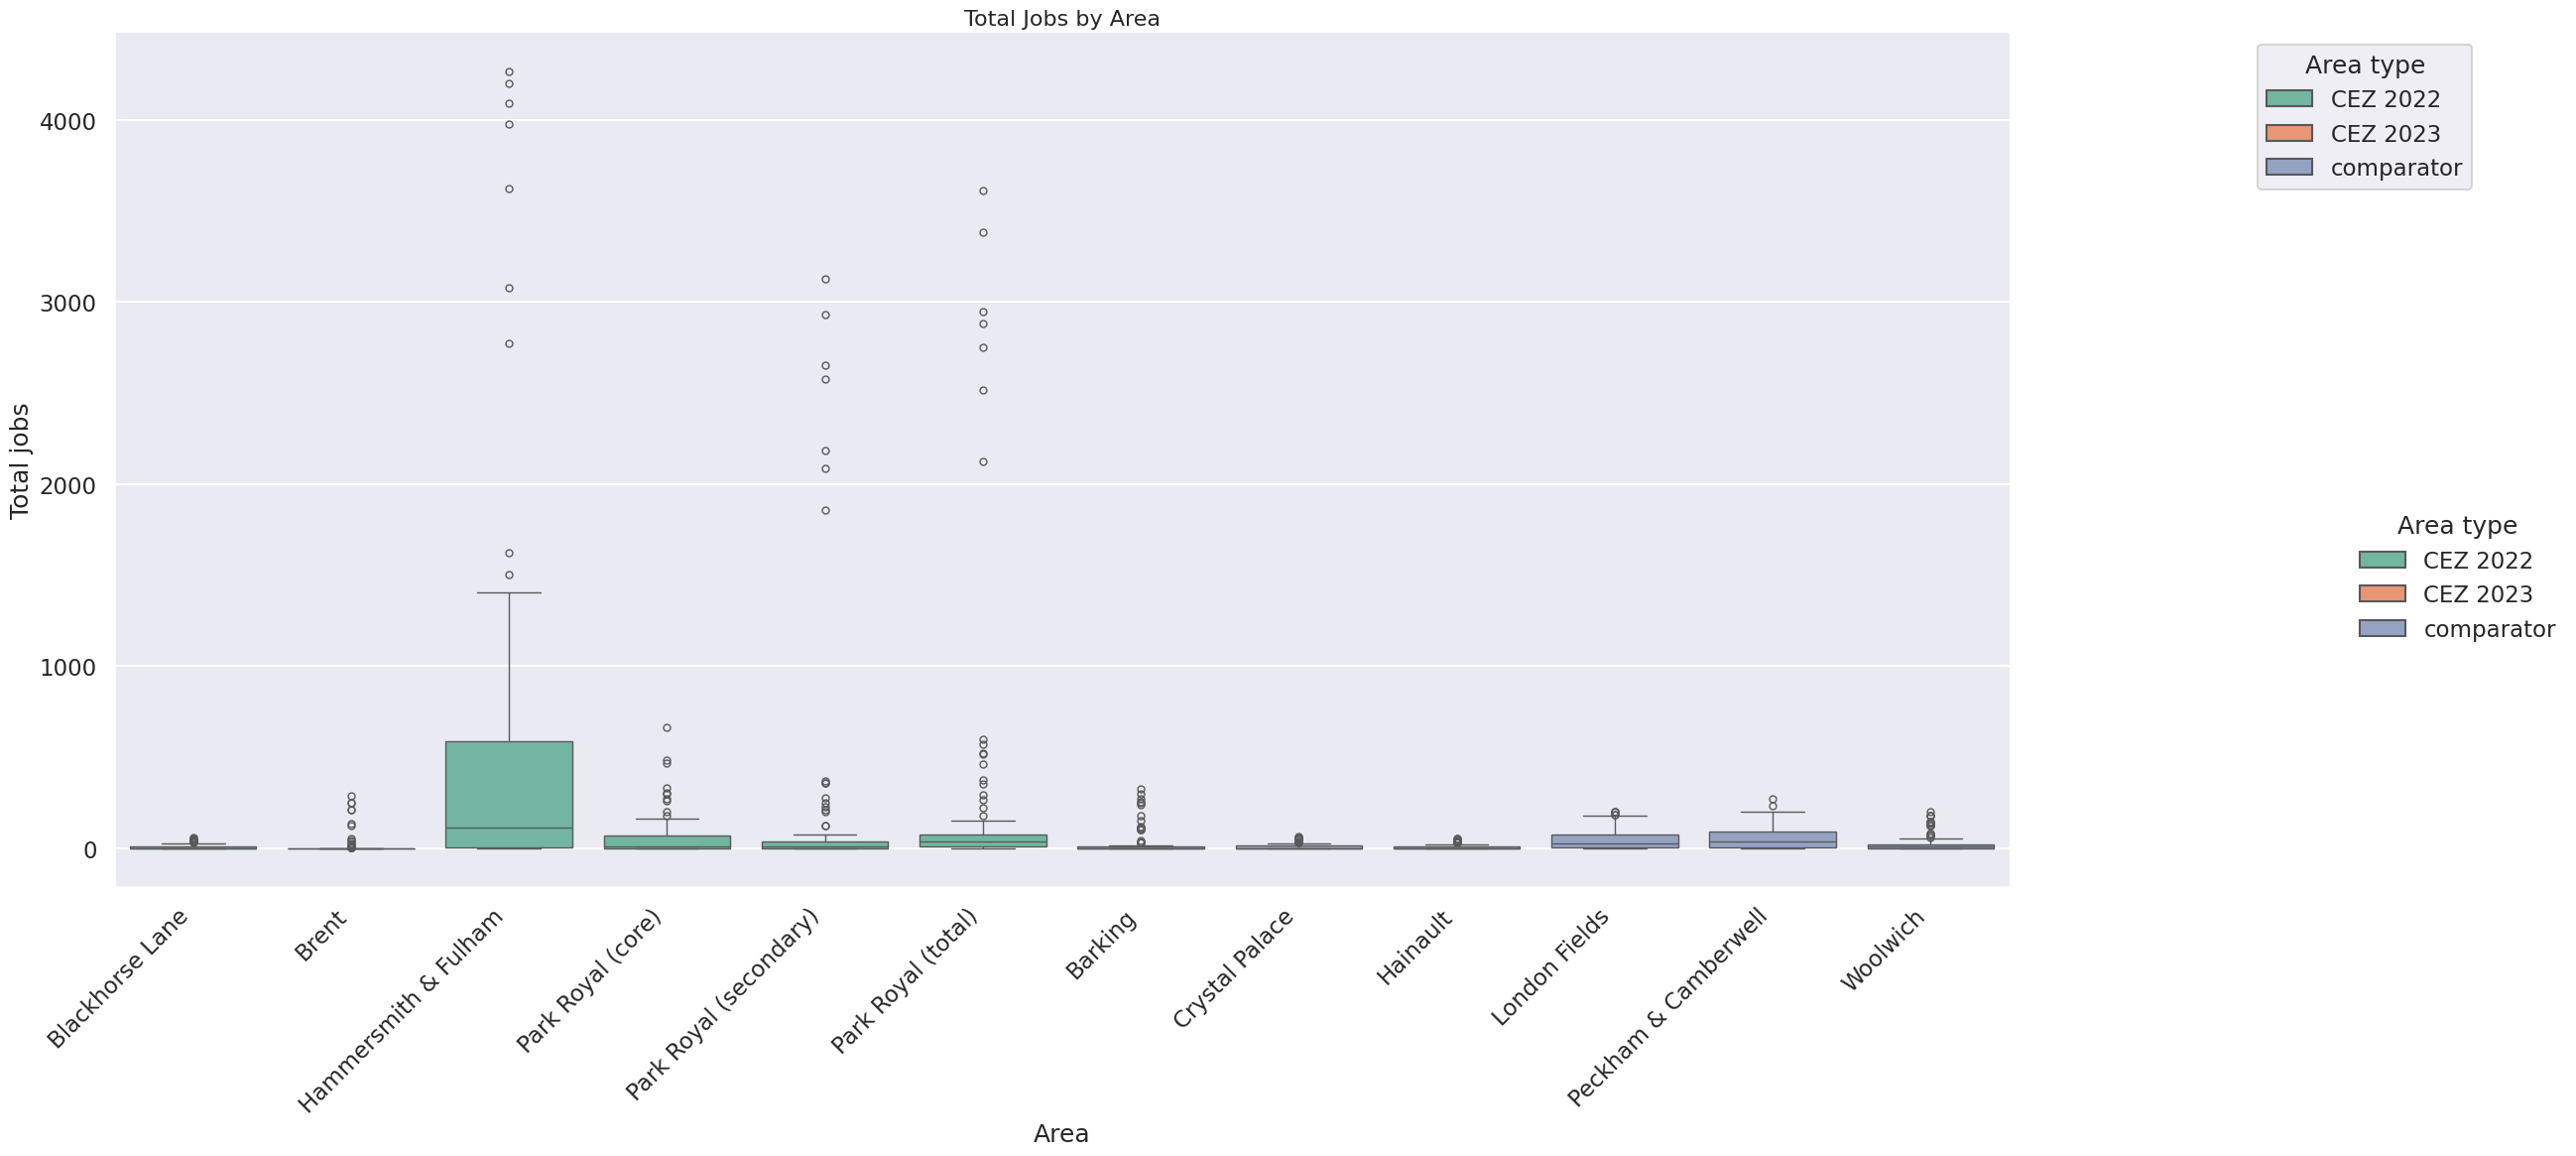

In [63]:
#plot for jobs
#figure out how to remove duplicate legends

sns.set_theme(context="talk")

plt.figure(figsize=(15, 12))
sns.catplot(
    data=random_CEZ_comp,
    x='Area',
    y='Total jobs',
    hue = 'Area type',
    kind = 'box',
    palette= 'Set2',
    height=12,
    aspect=2

)


plt.title('Total Jobs by Area', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Area type', loc='upper right', bbox_to_anchor=(1.25, 1))

plt.tight_layout()
plt.show()

<Figure size 1500x1200 with 0 Axes>

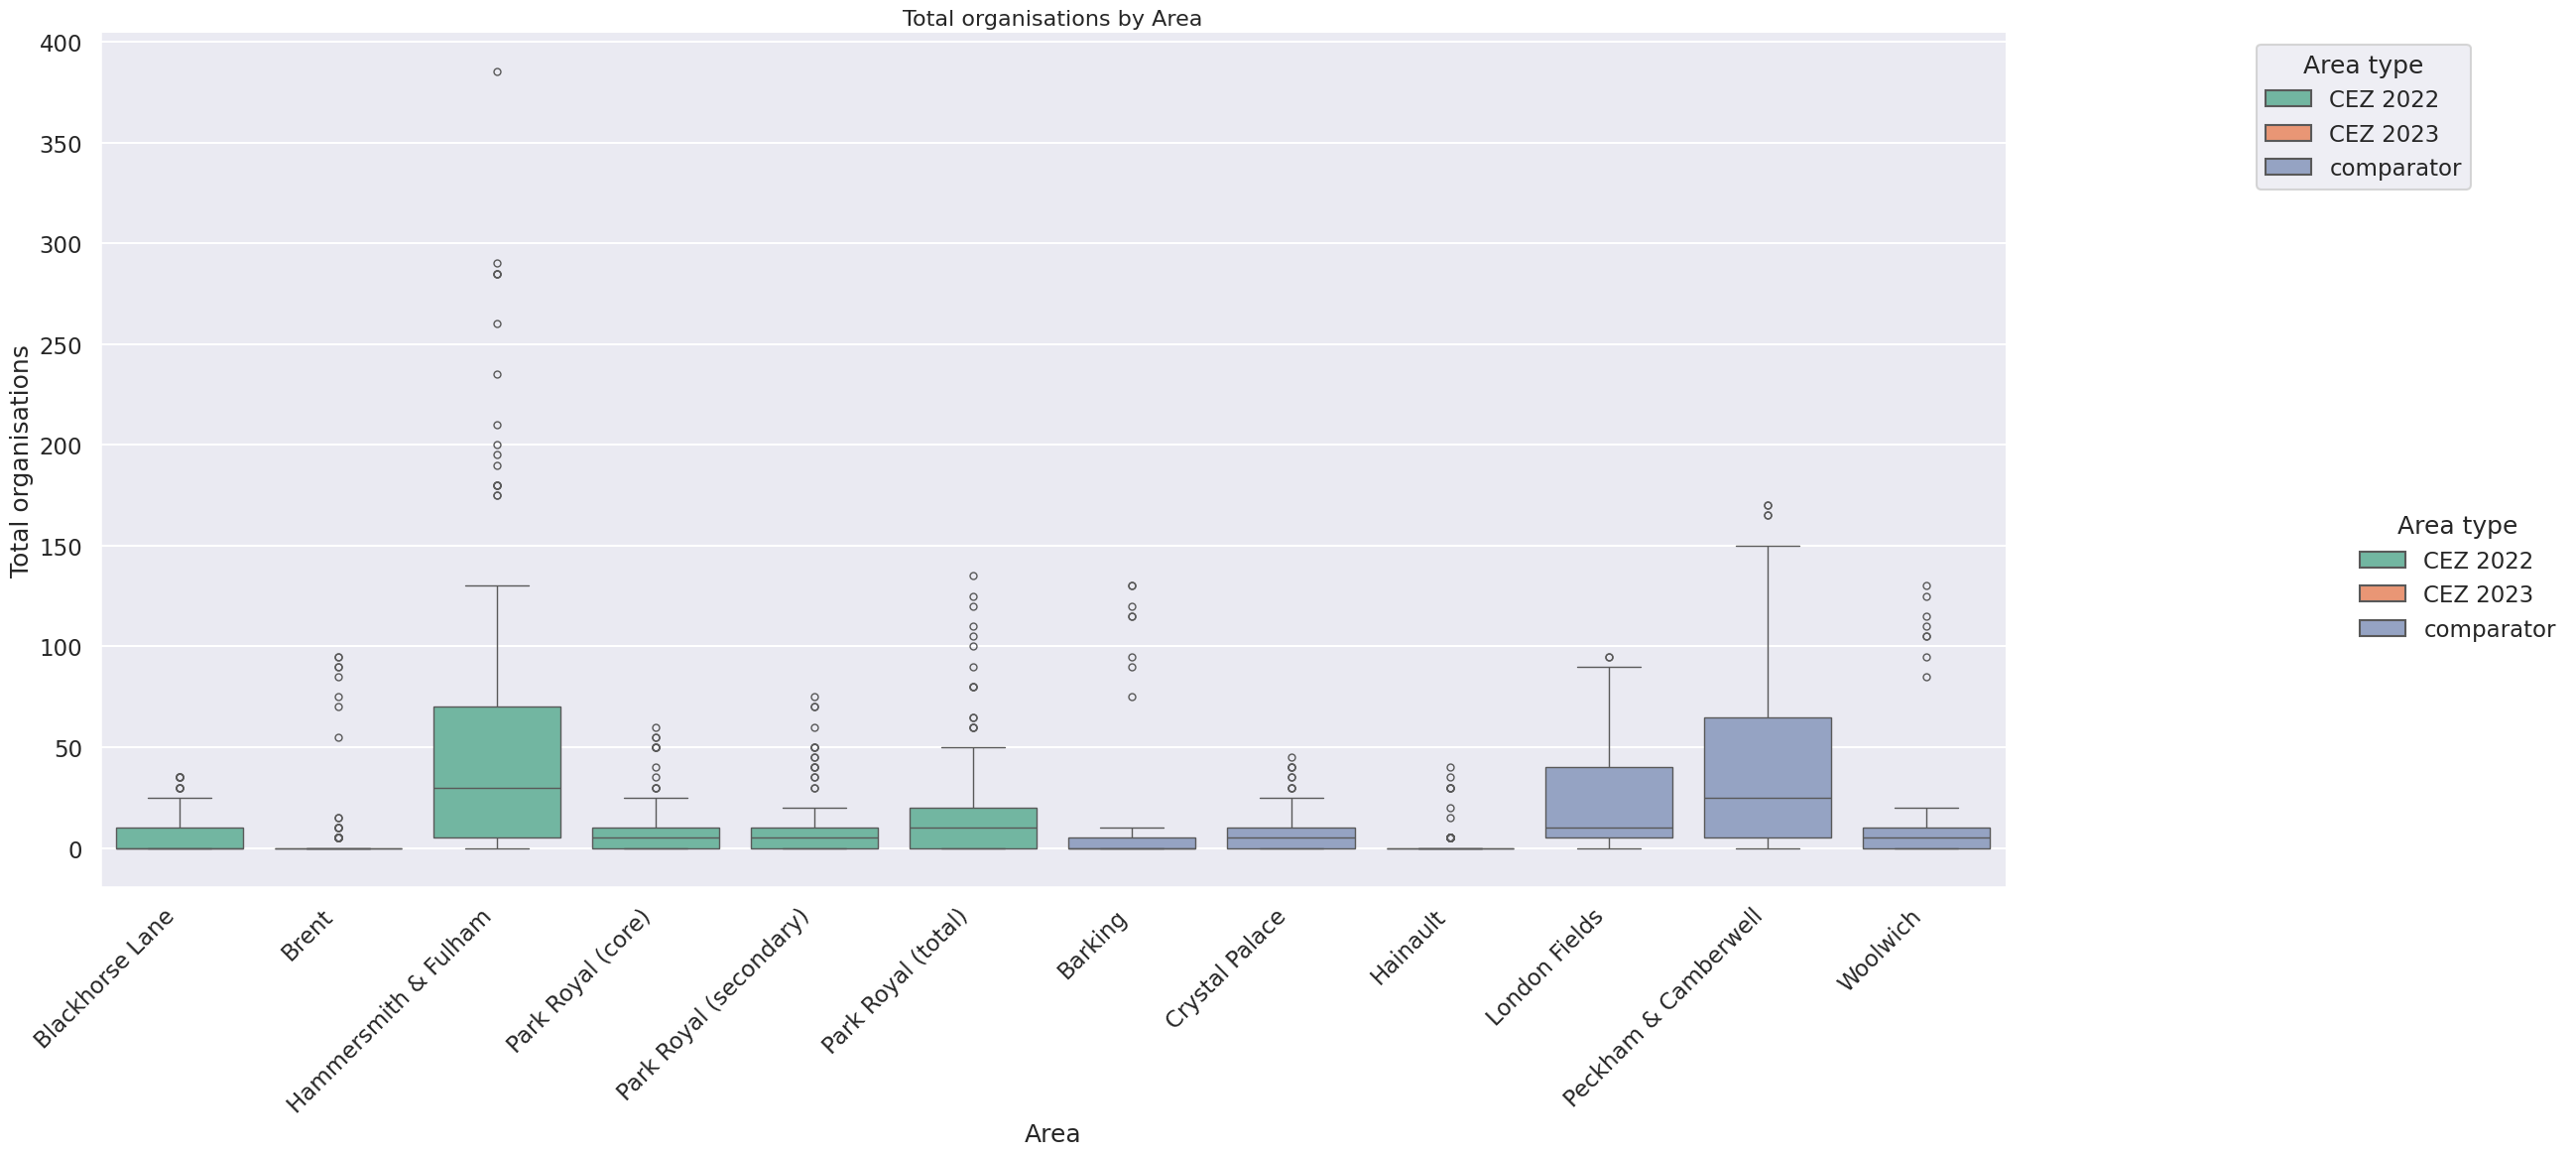

In [64]:
# plot for organisations
#figure out how to remove duplicate legends

sns.set_theme(context="talk")


plt.figure(figsize=(15, 12))

sns.catplot(
    data=random_CEZ_comp,
    x='Area',
    y='Total organisations',
    hue = 'Area type',
    kind = 'box',
    palette= 'Set2',
    height=12,
    aspect=2,

)
plt.title('Total organisations by Area', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Area type', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()

<Figure size 1500x1200 with 0 Axes>

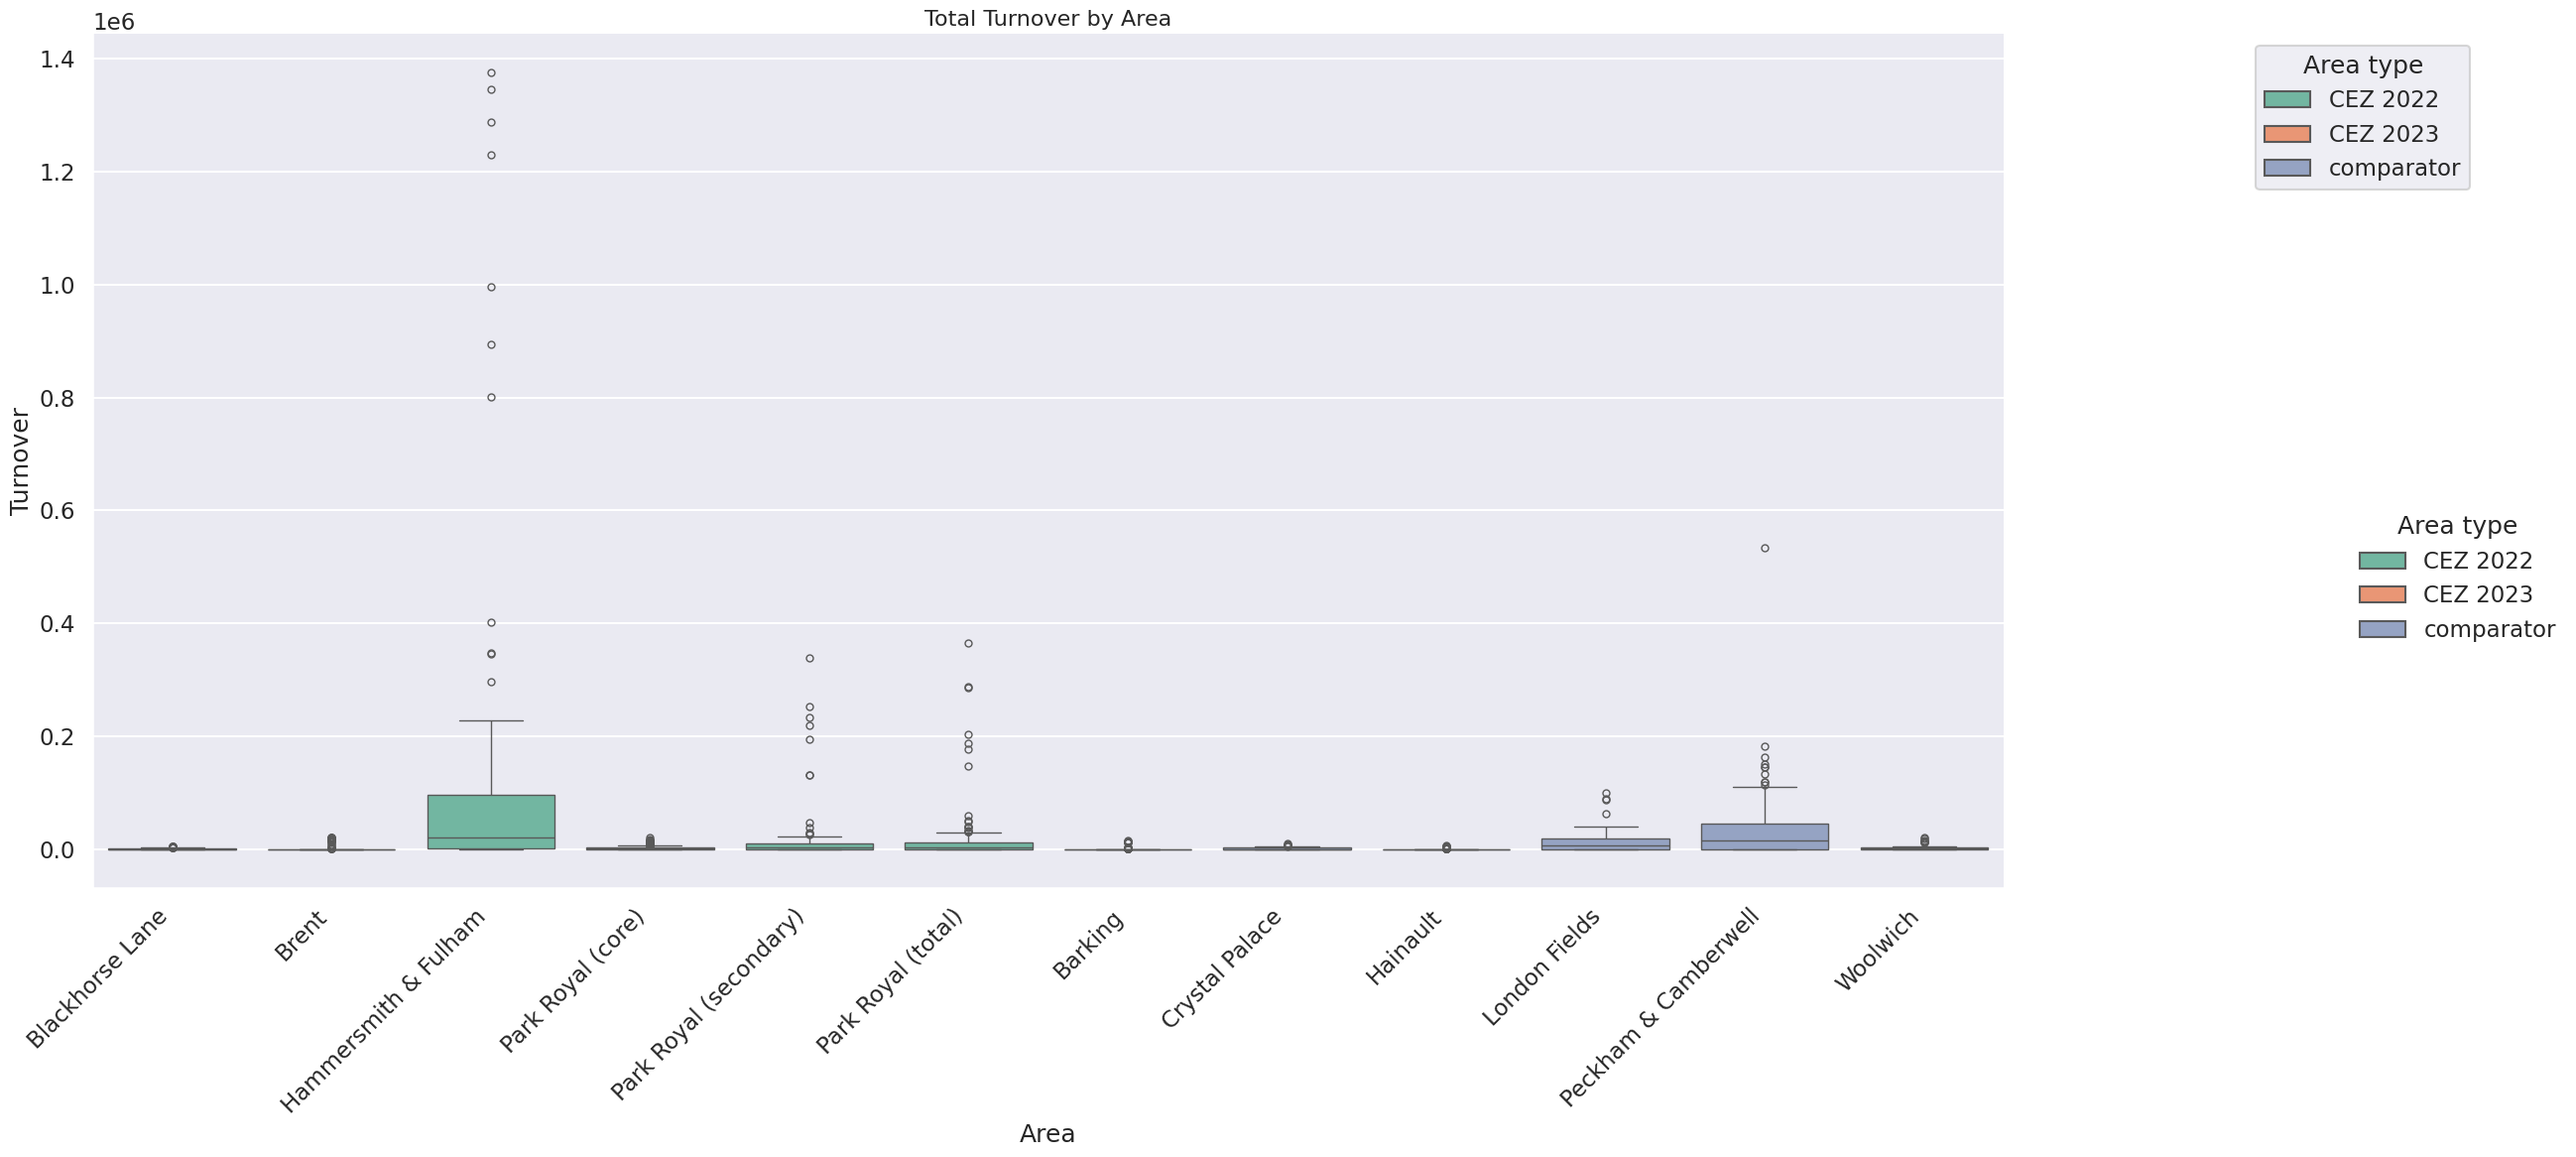

In [65]:
#plot for Turnover
#figure out how to remove duplicate legends

sns.set_theme(context="talk")

plt.figure(figsize=(15, 12))
sns.catplot(
    data=random_CEZ_comp,
    x='Area',
    y='Turnover',
    hue = 'Area type',
    kind = 'box',
    palette= 'Set2',
    height=12,
    aspect=2

)


plt.title('Total Turnover by Area', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Area type', loc='upper right', bbox_to_anchor=(1.25, 1))

plt.tight_layout()
plt.show()

In [66]:
#mean based sample?

# **Case Study**

Case study 1:

Hammersmith and Fulham: design and designer fashion.



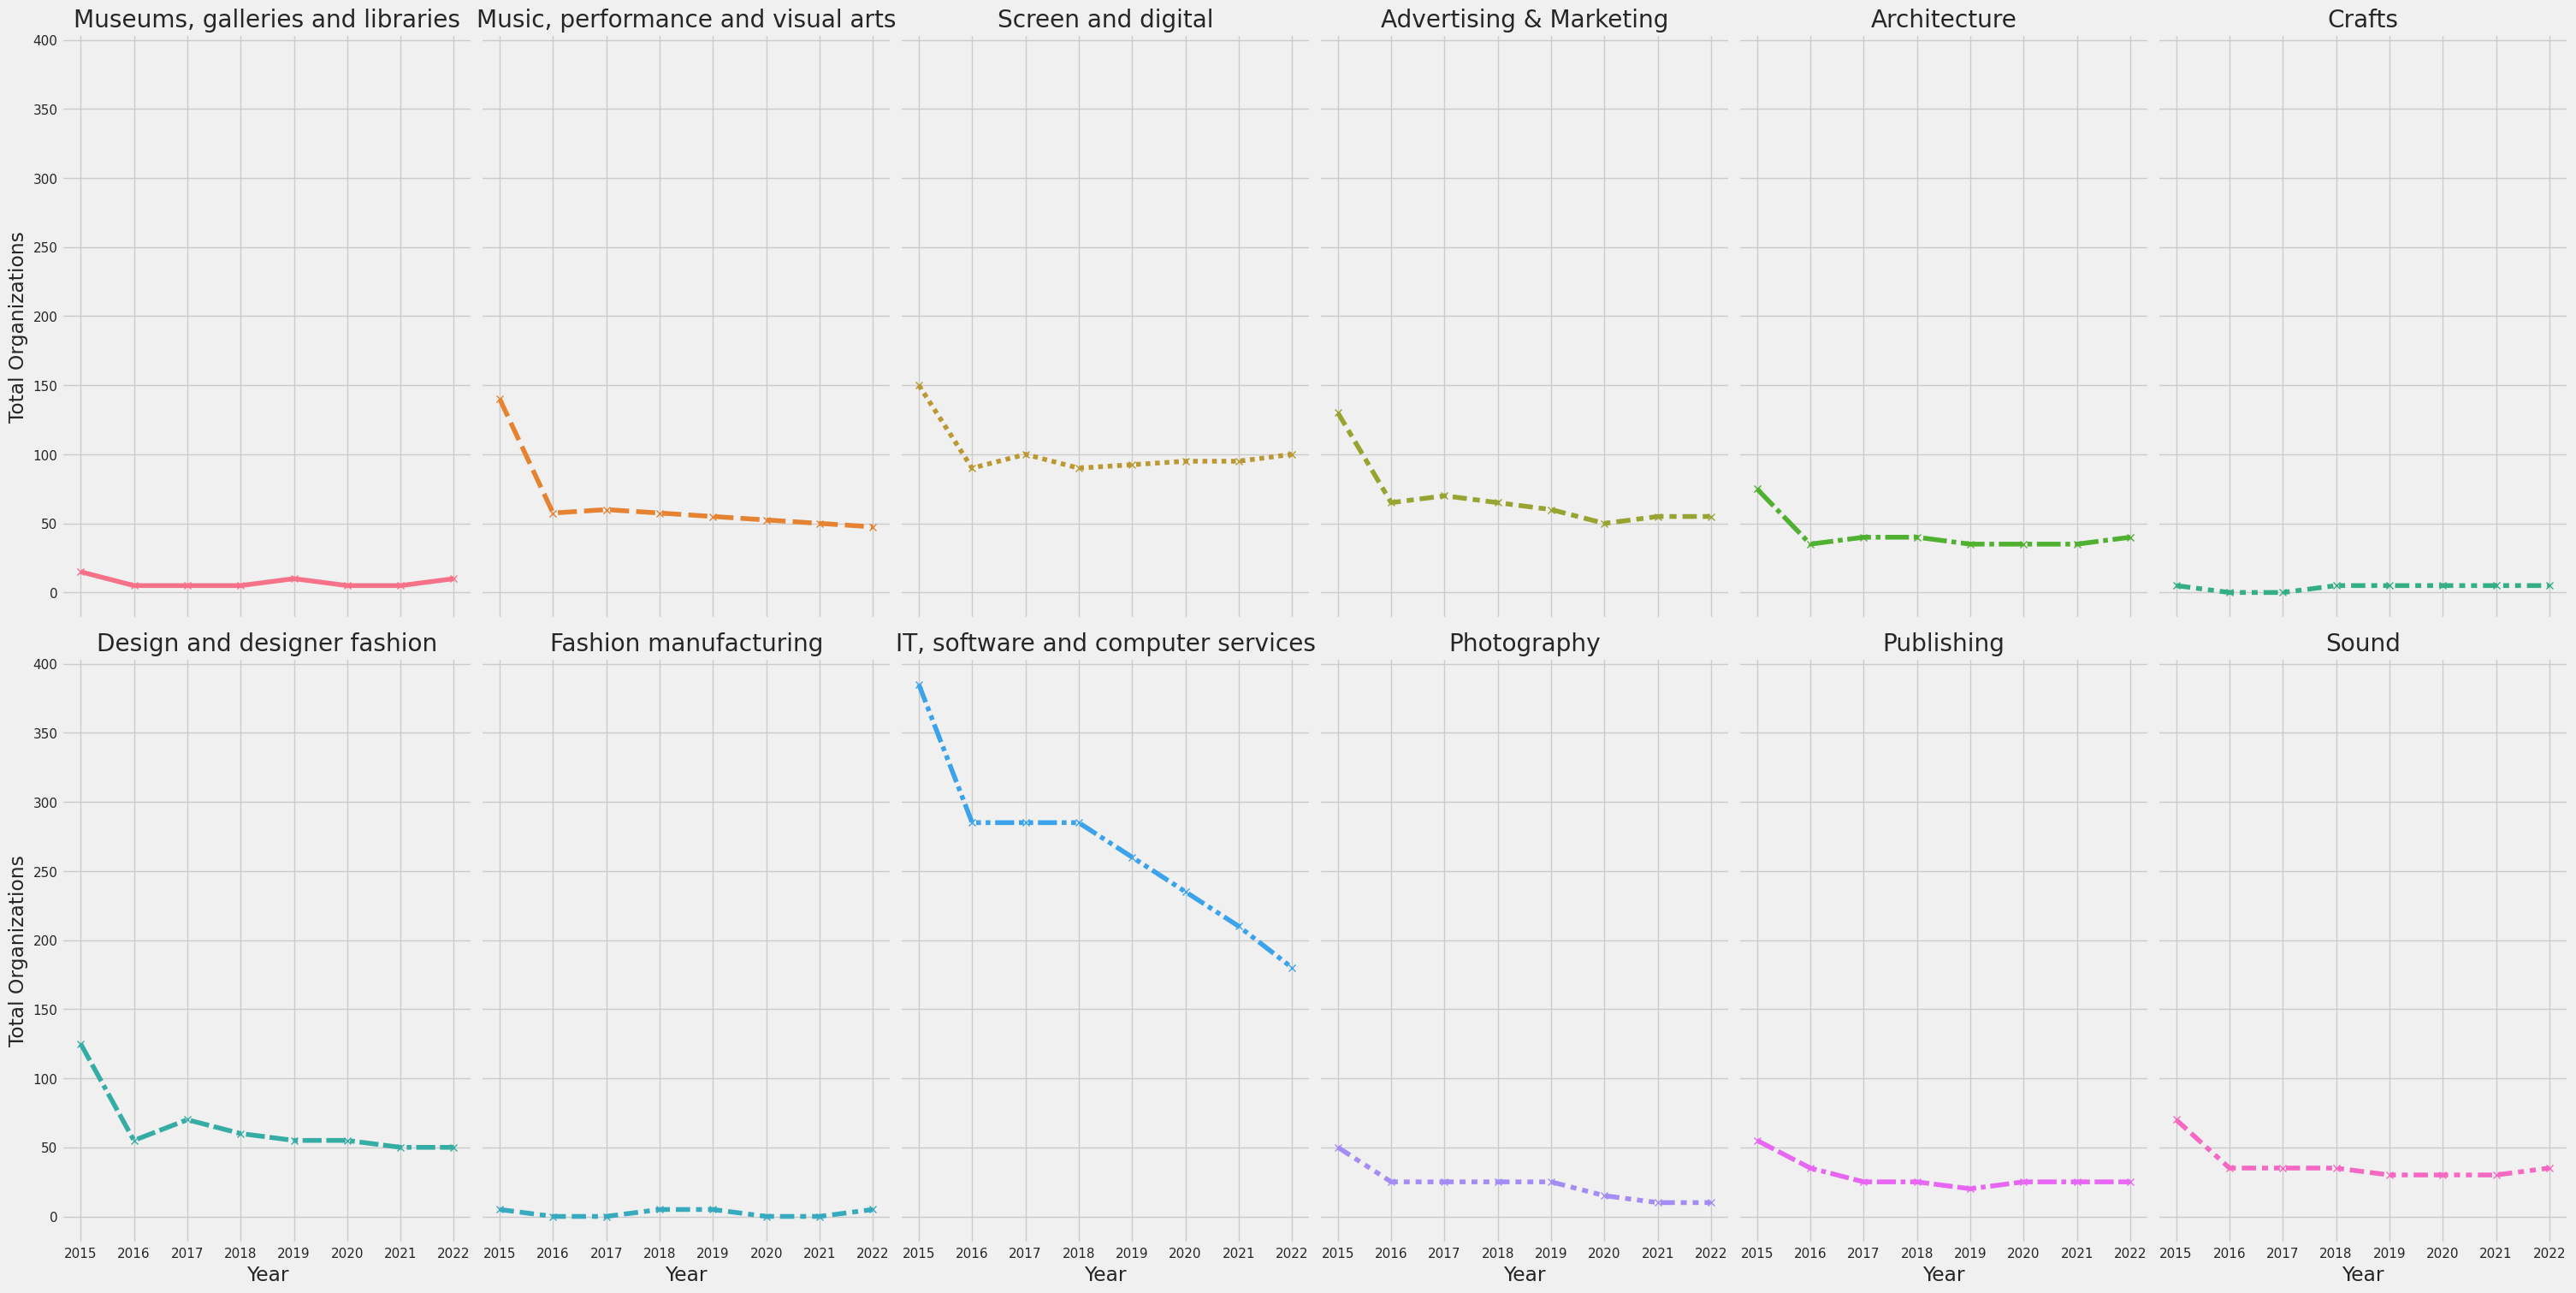

In [67]:
# plot showing a detailed view of the CEZ

from matplotlib import style
import seaborn.objects as so

sns.set_theme(context="talk")


df_ham = (master_df['Area'] == 'Hammersmith & Fulham') & (master_df['Subsector'] != 'Other')

(
    so.Plot(master_df[df_ham], x="Year", y="Total organisations", linestyle="Subsector", color='Subsector')
    .facet("Subsector", wrap=6)
    .add(so.Line(marker="x"), so.Agg(), legend=False)
    .layout(engine ='constrained', size=(30, 15))
    .label(x="Year", y="Total Organizations")
    .theme(style.library["fivethirtyeight"])
    .show()
)




Question? Has the decline in the number of design and designer fashion between 2015 qnd 2016, resulted in an increased number of organisations in other areas and a more even spread of organisations across the CEZ and comparator areas?

In [68]:
# displot comparing the numbers of organisation per area for 2015 and 2022

# **First-steps Towards Optimization**

Hold this space. 